**Importing Libraries**

In [1]:
import json, pandas, datetime, requests
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

**Reading and Writing Functions**

In [2]:
def json_yazma(data):
    for index, date in enumerate(data['date']):
        data['date'][index] = date.strftime("%m/%d/%Y, %H:%M:%S")

    with open('json_data.json', 'w') as outfile:
        json.dump(data, outfile)


In [3]:
def json_okuma():
    data_loaded = json.load(open('json_data.json'))
    for index, date in enumerate(data_loaded['date']):
        data_loaded['date'][index] = datetime.datetime.strptime(date, "%m/%d/%Y, %H:%M:%S")
    return data_loaded

**Data collecting from Alphavantage API**

In [4]:
def coin_data_collect(symbol = 'MANA',market = 'USD',interval='5min'):
    api_key = 'VKYYBU3O19HP6199'

    url = f'https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&outputsize=full&symbol={symbol}&market={market}&interval={interval}&apikey={api_key}'

    r = requests.get(url)
    data_collection = r.json()
    print('symbol: ', symbol , f'\n {symbol} Data Collected')
    
    with open('full_data.json', 'w') as outfile:
        json.dump(data_collection, outfile)
    
    data_col = {"open": [], "close": [], "low": [], "high": [], "volume": [], "date": []}

    for index, item in enumerate(data_collection[f"Time Series Crypto ({interval})"]):
        data_col["open"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["1. open"]))
        data_col["close"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["4. close"]))
        data_col["high"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["2. high"]))
        data_col["low"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["3. low"]))
        data_col["volume"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["5. volume"]))
        data_col["date"].append(datetime.datetime.strptime(item.replace('-','/'),'%Y/%m/%d %H:%M:%S')+timedelta(hours=3))

    return (data_col)


**Crypto Currency and Physical Currency Lists**

In [5]:
physical_currency_list={'currency code':['AED',	'AFN',	'ALL',	'AMD',	'ANG',	'AOA',	'ARS',	'AUD',	'AWG',	'AZN',	'BAM',	'BBD',	'BDT',	'BGN',	'BHD',	'BIF',	'BMD',	'BND',	'BOB',	'BRL',	'BSD',	'BTN',	'BWP',	'BZD',	'CAD',	'CDF',	'CHF',	'CLF',	'CLP',	'CNH',	'CNY',	'COP',	'CUP',	'CVE',	'CZK',	'DJF',	'DKK',	'DOP',	'DZD',	'EGP',	'ERN',	'ETB',	'EUR',	'FJD',	'FKP',	'GBP',	'GEL',	'GHS',	'GIP',	'GMD',	'GNF',	'GTQ',	'GYD',	'HKD',	'HNL',	'HRK',	'HTG',	'HUF',	'ICP',	'IDR',	'ILS',	'INR',	'IQD',	'IRR',	'ISK',	'JEP',	'JMD',	'JOD',	'JPY',	'KES',	'KGS',	'KHR',	'KMF',	'KPW',	'KRW',	'KWD',	'KYD',	'KZT',	'LAK',	'LBP',	'LKR',	'LRD',	'LSL',	'LYD',	'MAD',	'MDL',	'MGA',	'MKD',	'MMK',	'MNT',	'MOP',	'MRO',	'MRU',	'MUR',	'MVR',	'MWK',	'MXN',	'MYR',	'MZN',	'NAD',	'NGN',	'NOK',	'NPR',	'NZD',	'OMR',	'PAB',	'PEN',	'PGK',	'PHP',	'PKR',	'PLN',	'PYG',	'QAR',	'RON',	'RSD',	'RUB',	'RUR',	'RWF',	'SAR',	'SBDf',	'SCR',	'SDG',	'SDR',	'SEK',	'SGD',	'SHP',	'SLL',	'SOS',	'SRD',	'SYP',	'SZL',	'THB',	'TJS',	'TMT',	'TND',	'TOP',	'TRY',	'TTD',	'TWD',	'TZS',	'UAH',	'UGX',	'USD',	'UYU',	'UZS',	'VND',	'VUV',	'WST',	'XAF',	'XCD',	'XDR',	'XOF',	'XPF',	'YER',	'ZAR',	'ZMW',	'ZWL'],
'currency name':['United Arab Emirates Dirham',	'Afghan Afghani',	'Albanian Lek',	'Armenian Dram',	'Netherlands Antillean Guilder',	'Angolan Kwanza',	'Argentine Peso',	'Australian Dollar',	'Aruban Florin',	'Azerbaijani Manat',	'Bosnia-Herzegovina Convertible Mark',	'Barbadian Dollar',	'Bangladeshi Taka',	'Bulgarian Lev',	'Bahraini Dinar',	'Burundian Franc',	'Bermudan Dollar',	'Brunei Dollar',	'Bolivian Boliviano',	'Brazilian Real',	'Bahamian Dollar',	'Bhutanese Ngultrum',	'Botswanan Pula',	'Belize Dollar',	'Canadian Dollar',	'Congolese Franc',	'Swiss Franc',	'Chilean Unit of Account UF',	'Chilean Peso',	'Chinese Yuan Offshore',	'Chinese Yuan',	'Colombian Peso',	'Cuban Peso',	'Cape Verdean Escudo',	'Czech Republic Koruna',	'Djiboutian Franc',	'Danish Krone',	'Dominican Peso',	'Algerian Dinar',	'Egyptian Pound',	'Eritrean Nakfa',	'Ethiopian Birr',	'Euro',	'Fijian Dollar',	'Falkland Islands Pound',	'British Pound Sterling',	'Georgian Lari',	'Ghanaian Cedi',	'Gibraltar Pound',	'Gambian Dalasi',	'Guinean Franc',	'Guatemalan Quetzal',	'Guyanaese Dollar',	'Hong Kong Dollar',	'Honduran Lempira',	'Croatian Kuna',	'Haitian Gourde',	'Hungarian Forint',	'Internet Computer',	'Indonesian Rupiah',	'Israeli New Sheqel',	'Indian Rupee',	'Iraqi Dinar',	'Iranian Rial',	'Icelandic Krona',	'Jersey Pound',	'Jamaican Dollar',	'Jordanian Dinar',	'Japanese Yen',	'Kenyan Shilling',	'Kyrgystani Som',	'Cambodian Riel',	'Comorian Franc',	'North Korean Won',	'South Korean Won',	'Kuwaiti Dinar',	'Cayman Islands Dollar',	'Kazakhstani Tenge',	'Laotian Kip',	'Lebanese Pound',	'Sri Lankan Rupee',	'Liberian Dollar',	'Lesotho Loti',	'Libyan Dinar',	'Moroccan Dirham',	'Moldovan Leu',	'Malagasy Ariary',	'Macedonian Denar',	'Myanma Kyat',	'Mongolian Tugrik',	'Macanese Pataca',	'Mauritanian Ouguiya (pre-2018)',	'Mauritanian Ouguiya',	'Mauritian Rupee',	'Maldivian Rufiyaa',	'Malawian Kwacha',	'Mexican Peso',	'Malaysian Ringgit',	'Mozambican Metical',	'Namibian Dollar',	'Nigerian Naira',	'Norwegian Krone',	'Nepalese Rupee',	'New Zealand Dollar',	'Omani Rial',	'Panamanian Balboa',	'Peruvian Nuevo Sol',	'Papua New Guinean Kina',	'Philippine Peso',	'Pakistani Rupee',	'Polish Zloty',	'Paraguayan Guarani',	'Qatari Rial',	'Romanian Leu',	'Serbian Dinar',	'Russian Ruble',	'Old Russian Ruble',	'Rwandan Franc',	'Saudi Riyal',	'Solomon Islands Dollar',	'Seychellois Rupee',	'Sudanese Pound',	'Special Drawing Rights',	'Swedish Krona',	'Singapore Dollar',	'Saint Helena Pound',	'Sierra Leonean Leone',	'Somali Shilling',	'Surinamese Dollar',	'Syrian Pound',	'Swazi Lilangeni',	'Thai Baht',	'Tajikistani Somoni',	'Turkmenistani Manat',	'Tunisian Dinar',	'Tongan Pa\'anga',	'Turkish Lira',	'Trinidad and Tobago Dollar',	'New Taiwan Dollar',	'Tanzanian Shilling',	'Ukrainian Hryvnia',	'Ugandan Shilling',	'United States Dollar',	'Uruguayan Peso',	'Uzbekistan Som',	'Vietnamese Dong',	'Vanuatu Vatu',	'Samoan Tala',	'CFA Franc BEAC',	'East Caribbean Dollar',	'Special Drawing Rights',	'CFA Franc BCEAO',	'CFP Franc',	'Yemeni Rial',	'South African Rand',	'Zambian Kwacha',	'Zimbabwean Dollar']
}
crypto_currency_list={ 'currency code':['1ST',	'2GIVE',	'808',	'AAVE',	'ABT',	'ABY',	'AC',	'ACT',	'ADA',	'ADT',	'ADX',	'AE',	'AEON',	'AGI',	'AGRS',	'AI',	'AID',	'AION',	'AIR',	'AKY',	'ALGO',	'ALIS',	'AMBER',	'AMP',	'AMPL',	'ANC',	'ANT',	'APPC',	'APX',	'ARDR',	'ARK',	'ARN',	'AST',	'ATB',	'ATM',	'ATOM',	'ATS',	'AUR',	'AVAX',	'AVT',	'B3',	'BAND',	'BAT',	'BAY',	'BBR',	'BCAP',	'BCC',	'BCD',	'BCH',	'BCN',	'BCPT',	'BCX',	'BCY',	'BDL',	'BEE',	'BELA',	'BET',	'BFT',	'BIS',	'BITB',	'BITBTC',	'BITCNY',	'BITEUR',	'BITGOLD',	'BITSILVER',	'BITUSD',	'BIX',	'BLITZ',	'BLK',	'BLN',	'BLOCK',	'BLZ',	'BMC',	'BNB',	'BNT',	'BNTY',	'BOST',	'BOT',	'BQ',	'BRD',	'BRK',	'BRX',	'BSV',	'BTA',	'BTC',	'BTCB',	'BTCD',	'BTCP',	'BTG',	'BTM',	'BTS',	'BTSR',	'BTT',	'BTX',	'BURST',	'BUSD',	'BUZZ',	'BYC',	'BYTOM',	'C20',	'CAKE',	'CANN',	'CAT',	'CCRB',	'CDT',	'CFI',	'CHAT',	'CHIPS',	'CLAM',	'CLOAK',	'CMP',	'CMT',	'CND',	'CNX',	'COFI',	'COMP',	'COSS',	'COVAL',	'CRBIT',	'CREA',	'CREDO',	'CRO',	'CRW',	'CSNO',	'CTR',	'CTXC',	'CURE',	'CVC',	'DAI',	'DAR',	'DASH',	'DATA',	'DAY',	'DBC',	'DBIX',	'DCN',	'DCR',	'DCT',	'DDF',	'DENT',	'DFS',	'DGB',	'DGC',	'DGD',	'DICE',	'DLT',	'DMD',	'DMT',	'DNT',	'DOGE',	'DOPE',	'DOT',	'DRGN',	'DTA',	'DTB',	'DYN',	'EAC',	'EBST',	'EBTC',	'ECC',	'ECN',	'EDG',	'EDO',	'EFL',	'EGC',	'EGLD',	'EKT',	'ELA',	'ELEC',	'ELF',	'ELIX',	'EMB',	'EMC',	'EMC2',	'ENG',	'ENJ',	'ENRG',	'EOS',	'EOT',	'EQT',	'ERC',	'ETC',	'ETH',	'ETHD',	'ETHOS',	'ETN',	'ETP',	'ETT',	'EVE',	'EVX',	'EXCL',	'EXP',	'FCT',	'FIL',	'FLDC',	'FLO',	'FLT',	'FRST',	'FTC',	'FTT',	'FUEL',	'FUN',	'GAM',	'GAME',	'GAS',	'GBG',	'GBX',	'GBYTE',	'GCR',	'GEO',	'GLD',	'GNO',	'GNT',	'GOLOS',	'GRC',	'GRT',	'GRS',	'GRWI',	'GTC',	'GTO',	'GUP',	'GVT',	'GXS',	'HBAR',	'HBN',	'HEAT',	'HMQ',	'HPB',	'HSR',	'HT',	'HUSH',	'HVN',	'HXX',	'ICN',	'ICX',	'IFC',	'IFT',	'IGNIS',	'INCNT',	'IND',	'INF',	'INK',	'INS',	'INSTAR',	'INT',	'INXT',	'IOC',	'ION',	'IOP',	'IOST',	'IOTA',	'IOTX',	'IQT',	'ITC',	'IXC',	'IXT',	'J8T',	'JNT',	'KCS',	'KICK',	'KIN',	'KLAY',	'KMD',	'KNC',	'KORE',	'KSM',	'LBC',	'LCC',	'LEND',	'LEO',	'LEV',	'LGD',	'LINDA',	'LINK',	'LKK',	'LMC',	'LOCI',	'LOOM',	'LRC',	'LSK',	'LTC',	'LUN',	'LUNA',	'MAID',	'MANA',	'MATIC',	'MAX',	'MBRS',	'MCAP',	'MCO',	'MDA',	'MEC',	'MED',	'MEME',	'MER',	'MGC',	'MGO',	'MINEX',	'MINT',	'MIOTA',	'MITH',	'MKR',	'MLN',	'MNE',	'MNX',	'MOD',	'MONA',	'MRT',	'MSP',	'MTH',	'MTN',	'MUE',	'MUSIC',	'MYB',	'MYST',	'MZC',	'NAMO',	'NANO',	'NAS',	'NAV',	'NBT',	'NCASH',	'NDC',	'NEBL',	'NEO',	'NEOS',	'NET',	'NLC2',	'NLG',	'NMC',	'NMR',	'NOBL',	'NOTE',	'NPXS',	'NSR',	'NTO',	'NULS',	'NVC',	'NXC',	'NXS',	'NXT',	'OAX',	'OBITS',	'OCL',	'OCN',	'ODEM',	'ODN',	'OF',	'OK',	'OMG',	'OMNI',	'ONION',	'ONT',	'OPT',	'ORN',	'OST',	'PART',	'PASC',	'PAY',	'PBL',	'PBT',	'PFR',	'PING',	'PINK',	'PIVX',	'PIX',	'PLBT',	'PLR',	'PLU',	'POA',	'POE',	'POLY',	'POSW',	'POT',	'POWR',	'PPC',	'PPT',	'PPY',	'PRG',	'PRL',	'PRO',	'PST',	'PTC',	'PTOY',	'PURA',	'QASH',	'QAU',	'QLC',	'QRK',	'QRL',	'QSP',	'QTL',	'QTUM',	'QUICK',	'QWARK',	'R',	'RADS',	'RAIN',	'RBIES',	'RBX',	'RBY',	'RCN',	'RDD',	'RDN',	'REC',	'RED',	'REP',	'REQ',	'RHOC',	'RIC',	'RISE',	'RLC',	'RLT',	'RPX',	'RRT',	'RUFF',	'RUNE',	'RUP',	'RVT',	'SAFEX',	'SALT',	'SAN',	'SBD',	'SBTC',	'SC',	'SEELE',	'SEQ',	'SHIB',	'SHIFT',	'SIB',	'SIGMA',	'SIGT',	'SJCX',	'SKIN',	'SKY',	'SLR',	'SLS',	'SMART',	'SMT',	'SNC',	'SNGLS',	'SNM',	'SNRG',	'SNT',	'SOC',	'SOL',	'SOUL',	'SPANK',	'SPC',	'SPHR',	'SPR',	'SNX',	'SRN',	'START',	'STEEM',	'STK',	'STORJ',	'STORM',	'STQ',	'STRAT',	'STX',	'SUB',	'SWFTC',	'SWIFT',	'SWT',	'SYNX',	'SYS',	'TAAS',	'TAU',	'TCC',	'TFL',	'THC',	'THETA',	'TIME',	'TIX',	'TKN',	'TKR',	'TKS',	'TNB',	'TNT',	'TOA',	'TRAC',	'TRC',	'TRCT',	'TRIBE',	'TRIG',	'TRST',	'TRUE',	'TRUST',	'TRX',	'TUSD',	'TX',	'UBQ',	'UKG',	'ULA',	'UNB',	'UNI',	'UNITY',	'UNO',	'UNY',	'UP',	'URO',	'USDT',	'UST',	'UTK',	'VEE',	'VEN',	'VERI',	'VET',	'VIA',	'VIB',	'VIBE',	'VIVO',	'VOISE',	'VOX',	'VPN',	'VRC',	'VRM',	'VRS',	'VSL',	'VTC',	'VTR',	'WABI',	'WAN',	'WAVES',	'WAX',	'WBTC',	'WCT',	'WDC',	'WGO',	'WGR',	'WINGS',	'WPR',	'WTC',	'WTT',	'XAS',	'XAUR',	'XBC',	'XBY',	'XCN',	'XCP',	'XDN',	'XEL',	'XEM',	'NEM',	'XHV',	'XID',	'XLM',	'XMG',	'XMR',	'XMT',	'XMY',	'XPM',	'XRL',	'XRP',	'XSPEC',	'XST',	'XTZ',	'XUC',	'XVC',	'XVG',	'XWC',	'XZC',	'XZR',	'YEE',	'YOYOW',	'ZCC',	'ZCL',	'ZCO',	'ZEC',	'ZEN',	'ZET',	'ZIL',	'ZLA',	'ZRX'],
'currency name':	['FirstBlood',	'GiveCoin',	'808Coin',	'Aave',	'ArcBlock',	'ArtByte',	'AsiaCoin',	'Achain',	'Cardano',	'adToken',	'AdEx',	'Aeternity',	'Aeon',	'SingularityNET',	'IDNI-Agoras',	'POLY-AI',	'AidCoin',	'Aion',	'AirToken',	'Akuya-Coin',	'Algorand',	'ALIS',	'AmberCoin',	'Synereo',	'Ampleforth',	'Anoncoin',	'Aragon',	'AppCoins',	'APX-Ventures',	'Ardor',	'Ark',	'Aeron',	'AirSwap',	'ATBCoin',	'ATMChain',	'Cosmos',	'Authorship',	'Auroracoin',	'Avalanche',	'Aventus',	'B3Coin',	'Band Protocol',	'Basic-Attention-Token',	'BitBay',	'Boolberry',	'BCAP',	'BitConnect',	'Bitcoin-Diamond',	'Bitcoin-Cash',	'Bytecoin',	'BlockMason-Credit-Protocol-Token',	'BitcoinX',	'BitCrystals',	'Bitdeal',	'Bee-Token',	'BelaCoin',	'DAO-Casino',	'BF-Token',	'Bismuth',	'BitBean',	'BitBTC',	'BitCNY',	'BitEUR',	'BitGOLD',	'BitSILVER',	'BitUSD',	'Bibox-Token',	'Blitzcash',	'Blackcoin',	'Bolenum',	'Blocknet',	'Bluzelle',	'Blackmoon-Crypto',	'Binance-Coin',	'Bancor-Network-Token',	'Bounty0x',	'BoostCoin',	'Bodhi',	'bitqy',	'Bread',	'Breakout-Coin',	'Breakout-Stake',	'Bitcoin SV',	'Bata',	'Bitcoin',	'Bitcoin BEP2',	'BitcoinDark',	'Bitcoin-Private',	'Bitcoin-Gold',	'Bitmark',	'BitShares',	'BTSR',	'BitTorrent',	'Bitcore',	'Burstcoin',	'Binance-USD',	'BuzzCoin',	'Bytecent',	'Bytom',	'Crypto20',	'PancakeSwap',	'CannabisCoin',	'BlockCAT',	'CryptoCarbon',	'Blox',	'Cofound-it',	'ChatCoin',	'Chips',	'Clams',	'CloakCoin',	'Compcoin',	'CyberMiles',	'Cindicator',	'Cryptonex',	'CoinFi',	'Compound',	'COSS',	'Circuits-Of-Value',	'CreditBIT',	'CreativeCoin',	'Credo',	'Crypto.com Coin',	'Crown',	'BitDice',	'Centra',	'Cortex',	'CureCoin',	'Civic',	'Dai',	'Darcrus',	'Dash',	'DATAcoin',	'Chronologic',	'DeepBrain-Chain',	'DubaiCoin',	'Dentacoin',	'Decred',	'DECENT',	'Digital-Developers-Fund',	'Dent',	'DFSCoin',	'DigiByte',	'Digitalcoin',	'DigixDAO',	'Etheroll',	'Agrello-Delta',	'Diamond',	'DMarket',	'district0x',	'DogeCoin',	'DopeCoin',	'Polkadot',	'Dragonchain',	'Data',	'Databits',	'Dynamic',	'EarthCoin',	'eBoost',	'eBTC',	'ECC',	'E-coin',	'Edgeless',	'Eidoo',	'Electronic-Gulden',	'EverGreenCoin',	'Elrond',	'EDUCare',	'Elastos',	'Electrify.Asia',	'aelf',	'Elixir',	'Embercoin',	'Emercoin',	'Einsteinium',	'Enigma',	'Enjin-Coin',	'EnergyCoin',	'EOS',	'EOT-Token',	'EquiTrader',	'EuropeCoin',	'Ethereum-Classic',	'Ethereum',	'Ethereum-Dark',	'Ethos',	'Electroneum',	'Metaverse-Entropy',	'EncryptoTel',	'Devery',	'Everex',	'ExclusiveCoin',	'Expanse',	'Factom',	'Filecoin',	'FoldingCoin',	'FlorinCoin',	'FlutterCoin',	'FirstCoin',	'Feathercoin',	'FTX Token',	'Etherparty',	'FunFair',	'Gambit',	'GameCredits',	'Gas',	'Golos Gold',	'GoByte',	'Byteball',	'GCRCoin',	'GeoCoin',	'GoldCoin',	'Gnosis-Token',	'Golem-Tokens',	'Golos',	'Gridcoin',	'Graph',	'Groestlcoin',	'Growers-International',	'Game',	'Gifto',	'Guppy',	'Genesis-Vision',	'GXShares',	'Hedera',	'HoboNickels',	'HEAT',	'Humaniq',	'High-Performance-Blockchain',	'Hshare',	'Huobi Token',	'Hush',	'Hive',	'HexxCoin',	'ICONOMI',	'ICON',	'Infinitecoin',	'investFeed',	'Ignis',	'Incent',	'Indorse-Token',	'InfChain',	'Ink',	'INS-Ecosystem',	'Insights-Network',	'Internet-Node-Token',	'Internxt',	'IOCoin',	'ION',	'Internet-of-People',	'IOStoken',	'IOTA',	'IoTeX',	'Iquant-Chain',	'IoT-Chain',	'iXcoin',	'InsureX',	'JET8',	'Jibrel-Network',	'KuCoin',	'KickCoin',	'KIN',	'Klaytn',	'Komodo',	'Kyber-Network',	'KoreCoin',	'Kusama',	'LBRY-Credits',	'Litecoin-Cash',	'EthLend',	'UNUS SED LEO',	'Leverj',	'Legends-Room',	'Linda',	'ChainLink',	'Lykke',	'LoMoCoin',	'LOCIcoin',	'Loom-Token',	'Loopring',	'Lisk',	'Litecoin',	'Lunyr',	'Terra',	'MaidSafeCoin',	'Decentraland',	'Polygon',	'Maxcoin',	'Embers',	'MCAP',	'Monaco',	'Moeda-Loyalty-Points',	'Megacoin',	'MediBlock',	'Memetic',	'Mercury',	'MergeCoin',	'MobileGo',	'Minex',	'Mintcoin',	'IOTA',	'Mithril',	'Maker',	'Melon',	'Minereum',	'MinexCoin',	'Modum',	'MonaCoin',	'Miners-Reward-Token',	'Mothership',	'Monetha',	'MedToken',	'MonetaryUnit',	'Musicoin',	'MyBit-Token',	'Mysterium',	'Mazacoin',	'Namocoin',	'Nano',	'Nebulas-Token',	'Nav-Coin',	'NuBits',	'Nucleus-Vision',	'NeverDie-Coin',	'Neblio',	'NEO',	'NeosCoin',	'Nimiq',	'NoLimitCoin',	'Gulden',	'Namecoin',	'Numeraire',	'NobleCoin',	'DNotes',	'Pundi-X-Token',	'NuShares',	'Fujinto',	'Nuls',	'Novacoin',	'Nexium',	'Nexus',	'Nxt',	'openANX',	'Obits',	'Oceanlab',	'Odyssey',	'ODEM',	'Obsidian',	'OFCOIN',	'OKCash',	'OmiseGo',	'Omni',	'DeepOnion',	'Ontology',	'Opus',	'Orion-Protocol',	'Simple-Token',	'Particl',	'PascalCoin',	'TenX',	'Pebbles',	'Primalbase-Token',	'Payfair',	'CryptoPing',	'Pinkcoin',	'PIVX',	'Lampix',	'Polybius',	'Pillar',	'Pluton',	'POA-Network',	'Poet',	'Polymath',	'PoSW-Coin',	'PotCoin',	'Power-Ledger',	'Peercoin',	'Populous',	'Peerplays',	'Paragon-Coin',	'Oyster-Pearl',	'Propy',	'Primas',	'Pesetacoin',	'Patientory',	'Pura',	'QASH',	'Quantum',	'Qlink',	'Quark',	'Quantum-Resistant-Ledger',	'Quantstamp',	'Quatloo',	'Qtum',	'Quickswap',	'Qwark',	'Revain',	'Radium',	'Condensate',	'Rubies',	'Ripto-Bux',	'RubyCoin',	'Ripio-Credit-Network',	'ReddCoin',	'Raiden-Network-Token',	'Regalcoin',	'Redcoin',	'Augur',	'Request-Network',	'RChain',	'Riecoin',	'Rise',	'RLC-Token',	'RouletteToken',	'Red-Pulse',	'Recovery-Right-Tokens',	'Ruff',	'THORChain',	'Rupee',	'Rivetz',	'SafeExchangeCoin',	'Salt',	'Santiment-Network-Token',	'Steem-Dollars',	'Super-Bitcoin',	'Siacoin',	'Seele',	'Sequence',	'SHIBA-INU',	'SHIFT',	'SIBCoin',	'SIGMAcoin',	'Signatum',	'Storjcoin-X',	'SkinCoin',	'Skycoin',	'SolarCoin',	'SaluS',	'SmartCash',	'SmartMesh',	'SunContract',	'SingularDTV',	'SONM',	'Synergy',	'Status-Network-Token',	'All-Sports',	'Solana',	'Phantasma',	'SpankChain',	'SpaceChain',	'Sphere',	'SpreadCoin',	'Synthetix-Network-Token',	'Sirin-Labs-Token',	'Startcoin',	'Steem',	'STK-Token',	'Storj',	'Storm',	'Storiqa',	'Stratis',	'Stox',	'Substratum',	'SwftCoin',	'Bitswift',	'Swarm-City',	'Syndicate',	'SysCoin',	'Taas',	'Lamden',	'The-ChampCoin',	'True-Flip',	'HempCoin',	'Theta-Token',	'Time',	'Blocktix',	'TokenCard',	'Trackr',	'Tokes',	'Time-New-Bank',	'Tierion',	'ToaCoin',	'OriginTrail',	'Terracoin',	'Tracto',	'Tribe',	'Triggers',	'Trustcoin',	'TrueChain',	'TrustPlus',	'Tronix',	'TrueUSD',	'TransferCoin',	'Ubiq',	'UnikoinGold',	'Ulatech',	'UnbreakableCoin',	'Uniswap',	'SuperNET',	'Unobtanium',	'Unity-Ingot',	'UpToken',	'Uro',	'Tether',	'TerraUSD',	'UTrust',	'BLOCKv',	'VeChain',	'Veritaseum',	'VeChain',	'Viacoin',	'Viberate',	'Vibe',	'VIVO',	'Voise',	'Voxels',	'VPNCoin',	'Vericoin',	'Verium',	'Veros',	'vSlice',	'Vertcoin',	'vTorrent',	'WaBi',	'Wanchain',	'Waves',	'Wax-Token',	'Wrapped Bitcoin',	'Waves-Community',	'WorldCoin',	'WavesGo',	'Wagerr',	'Wings',	'WePower',	'Walton',	'Giga-Watt-Token',	'Asch',	'Xaurum',	'Bitcoin-Plus',	'XtraBYtes',	'Cryptonite',	'Counterparty',	'DigitalNote',	'Elastic',	'NEM',	'NEM',	'Haven-Protocol',	'Sphere-Identity',	'Stellar',	'Magi',	'Monero',	'Metal',	'Myriadcoin',	'Primecoin',	'Rialto',	'Ripple',	'Spectrecoin',	'Stealthcoin',	'Tezos',	'Exchange-Union',	'Vcash',	'Verge',	'WhiteCoin',	'ZCoin',	'ZrCoin',	'Yee',	'YOYOW',	'ZcCoin',	'Zclassic',	'Zebi',	'Zcash',	'ZenCash',	'Zetacoin',	'Zilliqa',	'Zilla',	'0x']
}

**Collecting or Reading Data**

In [6]:
# Zaman Koşulu falan koyulacak

# if    :
#     data = Data_producer.coin_data_collect()
#     json_yazma(data)
# else:
#     data = json_okuma()

data = coin_data_collect()
json_yazma(data)
data = json_okuma()

symbol:  MANA 
 MANA Data Collected


In [7]:
data_all = data

In [8]:

print(len(data_all['open']))
for i in data:
    data[i]= data[i][:945]
prices=pandas.DataFrame(data, index= data['date'])
prices.pop('date')
print(len(data['open']))
prices.head()


1000
945


,open,close,low,high,volume
2022-05-09 00:10:00,1.3517,1.3542,1.3503,1.3560,42358.0
2022-05-09 00:05:00,1.3502,1.3518,1.3477,1.3521,33497.0
2022-05-09 00:00:00,1.3459,1.3500,1.3459,1.3520,40823.0
2022-05-08 23:55:00,1.3408,1.3461,1.3397,1.3466,36280.0
2022-05-08 23:50:00,1.3395,1.3407,1.3390,1.3426,31238.0


**Grafik çizimi**

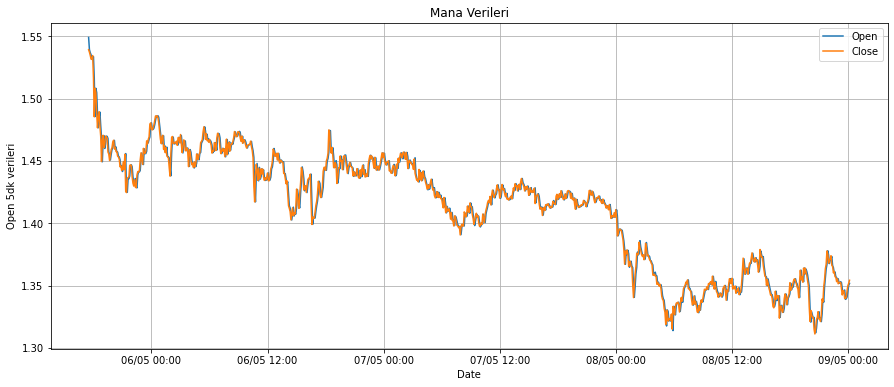

In [9]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title="Mana Verileri")


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

pyplot.plot(data['date'][:945], data['open'][:945], label = "Open")
pyplot.plot(data['date'][:945], data['close'][:945], label = "Close")

pyplot.legend()
pyplot.grid()

pyplot.show()


In [10]:
def analyze_data_collect(analyze='RSI',symbol = 'MANA',market = 'USD',interval='5min'):
    api_key = 'VKYYBU3O19HP6199'

    url = f'https://www.alphavantage.co/query?function={analyze}&symbol={symbol}{market}&interval={interval}&time_period=10&series_type=open&apikey={api_key}'
                                             #function=EMA&symbol=USDEUR&interval=weekly&time_period=10&series_type=open&apikey=demo
    r = requests.get(url)
    data_raw = r.json()
    print('symbol: ', analyze , f'\n {symbol} Data Collected')
    
    
    data_col = {f"{analyze}": [], "date": []}
        
    for index, item in enumerate(data_raw[f"Technical Analysis: {analyze}"]):
        
        data_col["date"].append(datetime.datetime.strptime(item.replace('-','/'),'%Y/%m/%d %H:%M')+timedelta(hours=3))
        data_col[f"{analyze}"].append(float(data_raw[f"Technical Analysis: {analyze}"][item][f'{analyze}']))
        

    return (data_col, data_raw)
    


In [11]:
rsi_data, raw_data = analyze_data_collect('RSI')
sma_data, raw2_data = analyze_data_collect('SMA')
t3_data, raw3_data = analyze_data_collect('T3')
mom_data, raw4_data = analyze_data_collect('MOM')

symbol:  RSI 
 MANA Data Collected
symbol:  SMA 
 MANA Data Collected
symbol:  T3 
 MANA Data Collected
symbol:  MOM 
 MANA Data Collected


In [12]:

all_analyze ={'RSI': rsi_data['RSI'][:945],'SMA': sma_data['SMA'][:945],'T3': t3_data['T3'][:945], 'MOM': mom_data['MOM'][:945]}
print('rsi len:',len(all_analyze['RSI']))
print('sma len:',len(all_analyze['SMA']))
print('t3 len:',len(all_analyze['T3']))
print('mom len:',len(all_analyze['MOM']))
pandas.DataFrame(all_analyze, index = rsi_data['date'][:945])

rsi len: 945
sma len: 945
t3 len: 945
mom len: 945


,RSI,SMA,T3,MOM
2022-05-08 20:10:00,55.0332,1.3450,1.3446,-0.0006
2022-05-08 20:05:00,52.6867,1.3451,1.3454,-0.0029
2022-05-08 20:00:00,45.3259,1.3454,1.3467,-0.0062
2022-05-08 19:55:00,34.4382,1.3460,1.3484,-0.0110
2022-05-08 19:50:00,31.2997,1.3471,1.3503,-0.0159
...,...,...,...,...
2022-05-05 13:50:00,9.3045,1.5505,1.5538,-0.0412
2022-05-05 13:45:00,10.1883,1.5547,1.5588,-0.0491
2022-05-05 13:40:00,10.5687,1.5596,1.5637,-0.0446
2022-05-05 13:35:00,11.1297,1.5640,1.5685,-0.0454


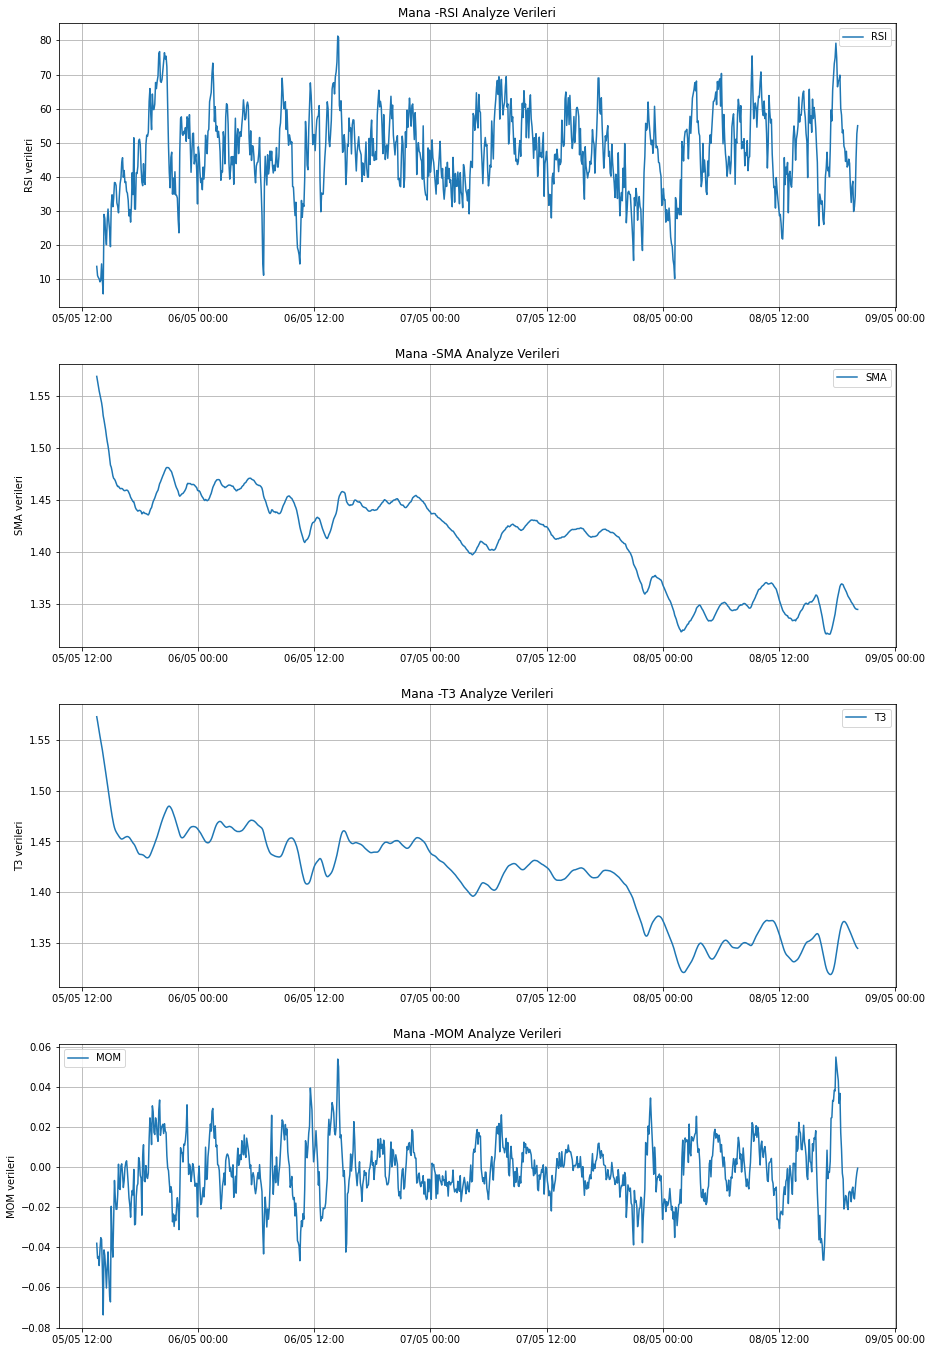

In [13]:
leng=len(all_analyze)
fig =pyplot.figure(figsize = (15,24))
for i in range(leng):
    sub_number = int(f'{leng}1{i+1}')
    names = list(all_analyze.items())
    
    ax = fig.add_subplot(sub_number)
    ax.set( 
       ylabel=f"{names[i][0]} verileri",
       title=f"Mana -{names[i][0]} Analyze Verileri")
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
    
    pyplot.plot(rsi_data['date'][:945], all_analyze[f'{names[i][0]}'], label = f"{names[i][0]}")

    pyplot.legend()
    pyplot.grid()
#     pyplot.xticks(rotation=45, ha='right') #for rotated dates at x axis
    

**Candle Graph**

In [14]:
# fig = pyplot.figure(figsize=(15,24))
# ax=fig.add_subplot(511)
# ax.set( 
#        ylabel="Open 5dk verileri",
#        title="Mana Verileri")

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# pyplot.plot(data['date'], data['open'], label = "Open")
# pyplot.plot(data['date'], data['close'], label = "Close")

# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(512)
# ax.set(xlabel="Date", 
#        ylabel="RSI verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(rsi_data['date'],rsi_data['RSI'],label ="RSI")
# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(515)
# ax.set(xlabel="Date", 
#        ylabel="SMA verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(sma_data['date'],sma_data['SMA'][:991],label ="SMA")
# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(514)
# ax.set(xlabel="Date", 
#        ylabel="T3 verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(t3_data['date'],t3_data['T3'],label ="T3")
# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(513)
# ax.set(xlabel="Date", 
#        ylabel="MOM verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(mom_data['date'],mom_data['MOM'],label ="MOM")
# pyplot.legend()
# pyplot.grid()

# pyplot.show()

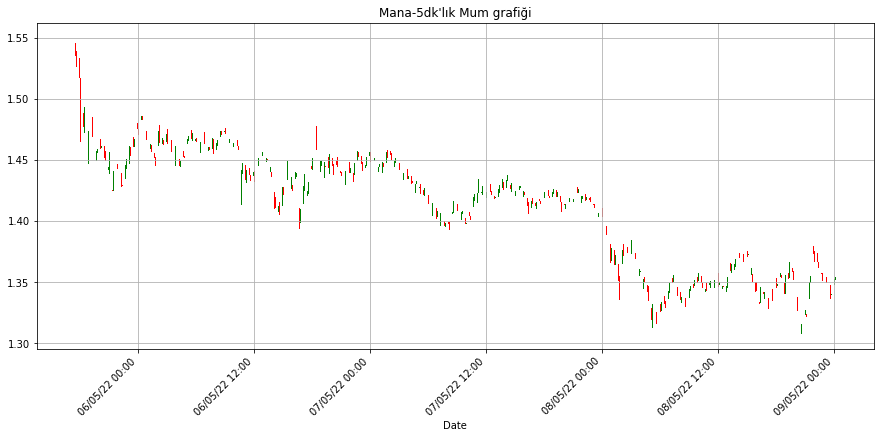

In [15]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       title="Mana-5dk'lık Mum grafiği")

width = 0.0015
width2 = 0.001

up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

col1 = 'green'
col2 = 'red'

pyplot.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
pyplot.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
pyplot.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

pyplot.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
pyplot.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
pyplot.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))

pyplot.xticks(rotation=45, ha='right')
pyplot.grid()

pyplot.show()


**Date datasını 0'dan başlatınca daha mantıklı regression yapıyor.**

In [16]:
for index,date in enumerate(data['date']):
#     y=date.year
#     m=date.month + y*12
#     d=date.day + m*30
#     h=date.hour + d*24
#     m=date.minute + h*60
#     date = m
    data['date'][index]=index*5  
    
data_train, data_test, data_check = {}, {}, {}
    
for i in data:
    data_train[i] = data[i][:900]
    data_check[i]= data[i][900:]
print('data_train :',len(data_train['open']))
print('data_check :',len(data_check['open']))

data_train : 900
data_check : 45


**Polynomial Regression With scikit-learn**

In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array(data_train['date']).reshape((-1,1))
y= np.array(data_train['open']).reshape((-1,1))



**Finding Optimum Degree**

In [18]:
def find_optimum_degree(x=x,y=y):
    degree_num = 1
    error_r =[]
    error_degree = []
    for i in range(20):
        degree_num = i+1
        x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x)
        model = LinearRegression().fit(x_, y)
        r_sq = model.score(x_, y)
        print(f'Degree {degree_num} coefficient of determination:', r_sq)
#         print(f'Degree {degree_num} intercept:', model.intercept_)
#         print(f'Degree {degree_num} coefficients:', model.coef_)
        error_r.append(r_sq)
        error_degree.append(i)
        
    print('************************')
    print(f'Max r value is {max(error_r)}, so that optimum degree is {error_r.index(max(error_r))+1}')
    print('************************')
    
    fig, ax = pyplot.subplots(figsize=(15, 6))

    ax.set(xlabel="Degree",
           ylabel="R value",
           title="Error Verileri")

    pyplot.plot(error_degree, error_r, label = "Error")
    


    pyplot.legend()
    pyplot.grid()

    pyplot.show()
    degree_return = error_r.index(max(error_r))+1
    
    return degree_return

Degree 1 coefficient of determination: 0.7993598087787835
Degree 2 coefficient of determination: 0.8252173127538325
Degree 3 coefficient of determination: 0.8346005349878749
Degree 4 coefficient of determination: 0.8505961341716501
Degree 5 coefficient of determination: 0.8445486628423977
Degree 6 coefficient of determination: 0.8615689897007871
Degree 7 coefficient of determination: 0.8677258757310878
Degree 8 coefficient of determination: 0.8468961565675626
Degree 9 coefficient of determination: 0.8083424972698432
Degree 10 coefficient of determination: 0.7631760680348032
Degree 11 coefficient of determination: 0.7174888424898085
Degree 12 coefficient of determination: 0.6738694603897613
Degree 13 coefficient of determination: 0.6333989565573329
Degree 14 coefficient of determination: 0.5965897242494554
Degree 15 coefficient of determination: 0.5636623137255646
Degree 16 coefficient of determination: 0.5346030488168461
Degree 17 coefficient of determination: 0.5092005453294177
Degree

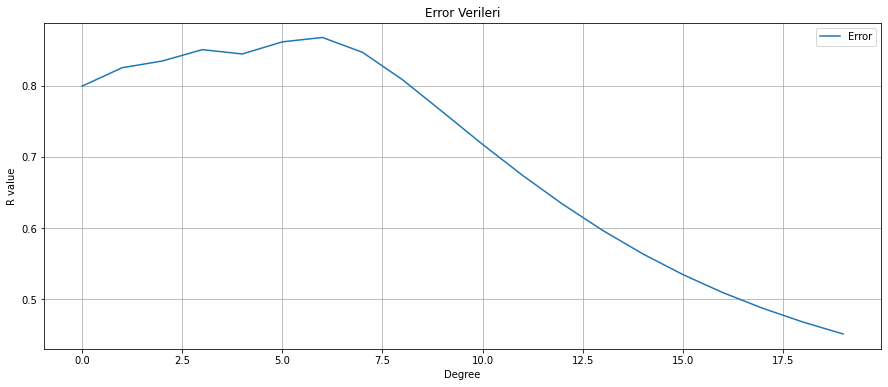

In [19]:
optimum_degree = find_optimum_degree()

In [20]:
degree_num = optimum_degree

x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x)

In [21]:
model = LinearRegression().fit(x_, y)

In [22]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8677258757310878
intercept: [1.34494227]
coefficients: [[ 1.75744970e-23 -1.28692605e-17  4.06714330e-17  3.25137100e-14
  -2.41575293e-17  6.14590136e-21 -5.27363838e-25]]


In [23]:
x_2 = np.array(data_check['date']).reshape((-1,1))
x_2 = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_2)
y_pred = model.predict(x_2)
y_train = model.predict(x_)

y_all = []

for yt in y_train:
    y_all.append(yt[0])
for yp in y_pred:
    y_all.append(yp[0])


**Pivot and Support&Resistance Point Determination**

In [24]:
o=data['open'][-1]
c=data['close'][-1]
h=data['high'][-1]
l=data['low'][-1]

In [25]:
p = (h+l+c)/3

S1=2*p-h
R1=2*p-l
print('Sup1',S1,'Res1',R1)

S2=p-(h-l)
R2=p+(h-l)
print('Sup2',S2,'Res2',R2)


R3 = h + 2 * (p - l)
S3 = l - 2 * (h - p)
print('Sup3',S3,'Res2',R3)

Sup1 1.5346 Res1 1.5471
Sup2 1.5299 Res2 1.5549
Sup3 1.5221 Res2 1.5595999999999999


**Grafik Çizimi**

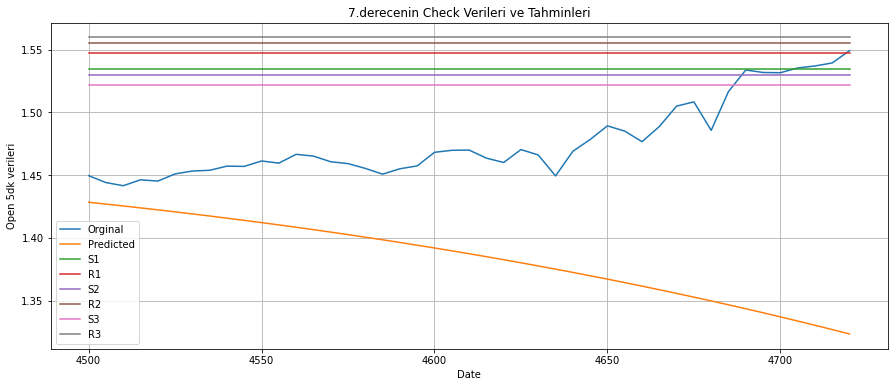

In [26]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title=f"{degree_num}.derecenin Check Verileri ve Tahminleri")

pyplot.plot(data_check['date'], data_check['open'], label = "Orginal")
pyplot.plot(data_check['date'], y_pred, label = "Predicted")

pyplot.plot(data_check['date'], [S1]*len(data_check['date']), label = "S1")
pyplot.plot(data_check['date'], [R1]*len(data_check['date']), label = "R1")

pyplot.plot(data_check['date'], [S2]*len(data_check['date']), label = "S2")
pyplot.plot(data_check['date'], [R2]*len(data_check['date']), label = "R2")

pyplot.plot(data_check['date'], [S3]*len(data_check['date']), label = "S3")
pyplot.plot(data_check['date'], [R3]*len(data_check['date']), label = "R3")


pyplot.legend()
pyplot.grid()

pyplot.show()

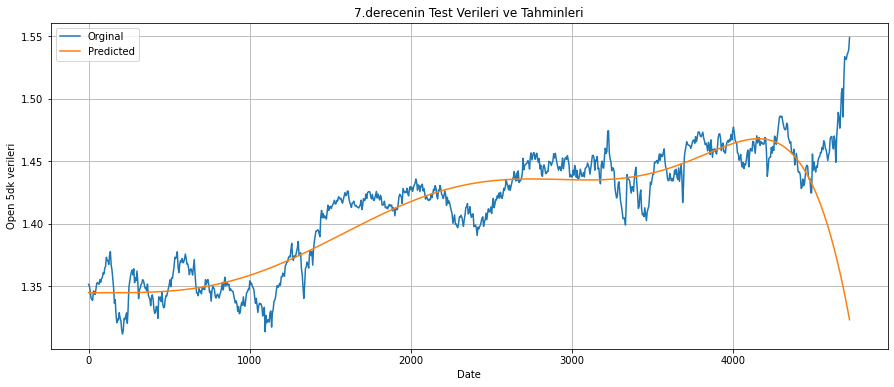

In [27]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title=f"{degree_num}.derecenin Test Verileri ve Tahminleri")

pyplot.plot(data['date'], data['open'], label = "Orginal")
pyplot.plot(data['date'], y_all, label = "Predicted")


pyplot.legend()
pyplot.grid()

pyplot.show()

In [28]:
x_ = PolynomialFeatures(degree=degree_num+1, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)

x_3 = np.array(data_check['date']).reshape((-1,1))
x_3 = PolynomialFeatures(degree=degree_num+1, include_bias=False).fit_transform(x_3)
y_pred2_up = model.predict(x_3)

y_pred_ort=[]
for index,item in enumerate(y_pred):
    y_pred_ort.append([np.sqrt(item[0] * y_pred2_up[index][0])])


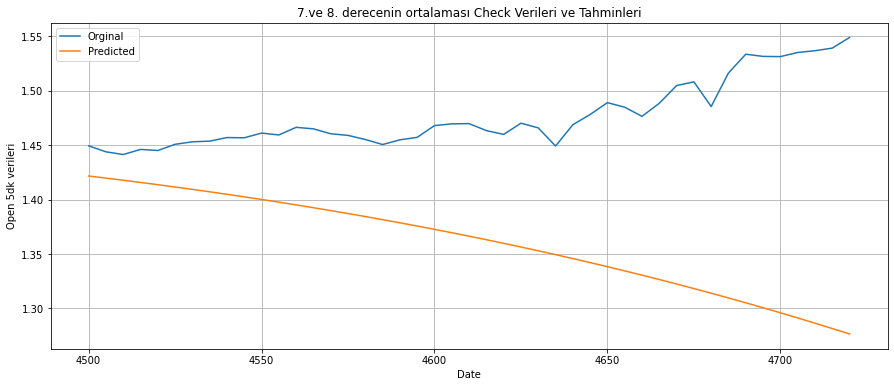

In [29]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title=f"{degree_num}.ve {degree_num+1}. derecenin ortalaması Check Verileri ve Tahminleri")

pyplot.plot(data_check['date'], data_check['open'], label = "Orginal")
pyplot.plot(data_check['date'], y_pred_ort, label = "Predicted")


pyplot.legend()
pyplot.grid()

pyplot.show()

**5 Parçaya Bölüp Regression Yaptırınca**

In [30]:
data_train_sliced = {}
# cut should be divide 945 without remaning
cut =15
tr = int((945/cut)*0.8)
pr = int(945/cut-tr)
print('train data lenth of each slice: ',tr)
print('predict data lenth of each slice: ',pr)


for j in range(cut):
    data_train_sliced[f'slice_train{j}'] = {}
    data_train_sliced[f'slice_test{j}'] = {}
    a=0
    b=0
    for i in data:   
        a =tr*(j)+(pr*(j))
        c=tr*(j+1)+(pr*(j))
        b =tr*(j+1)+(pr*(j+1))
          
        data_train_sliced[f'slice_train{j}'][i] = data[i][a:c]
        data_train_sliced[f'slice_test{j}'][i] = data[i][c:b]
    

train data lenth of each slice:  50
predict data lenth of each slice:  13


In [31]:
# print(data_train_sliced['slice_train3']['date'])
print(len(data_train_sliced))
for i in data_train_sliced:
    print(i)

30
slice_train0
slice_test0
slice_train1
slice_test1
slice_train2
slice_test2
slice_train3
slice_test3
slice_train4
slice_test4
slice_train5
slice_test5
slice_train6
slice_test6
slice_train7
slice_test7
slice_train8
slice_test8
slice_train9
slice_test9
slice_train10
slice_test10
slice_train11
slice_test11
slice_train12
slice_test12
slice_train13
slice_test13
slice_train14
slice_test14


In [32]:
def sliced_reg():
    y_all=[]
    error_r_all ={} 
    
    for i in range(int(len(data_train_sliced)/2)):
        
        x_slice = np.array(data_train_sliced[f'slice_train{i}']['date']).reshape((-1,1))
        y_slice = np.array(data_train_sliced[f'slice_train{i}']['open']).reshape((-1,1))
        
        error_r_all[f'interval_{i}']={}
        
        degree_num = 1
        error_degree = []
        error_r =[]
        
        for ip in range(20):
            degree_num = ip+1
            x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_slice)
            model = LinearRegression().fit(x_, y_slice)
            r_sq = model.score(x_, y_slice)
            print(f'Degree {degree_num} coefficient of determination:', r_sq)
#         print(f'Degree {degree_num} intercept:', model.intercept_)
#         print(f'Degree {degree_num} coefficients:', model.coef_)
            error_r.append(r_sq)
            error_degree.append(ip)
            error_r_all[f'interval_{i}']=error_r
        
        print('************************')
        print(f'Max r value is {max(error_r)}, so that optimum degree is {error_r.index(max(error_r))+1}')
        print('************************')
    
        fig, ax = pyplot.subplots(figsize=(15, 6))

        ax.set(xlabel="Degree",
               ylabel="R value",
               title="Error Verileri")

        pyplot.plot(error_degree, error_r, label = "Error")
    


        pyplot.legend()
        pyplot.grid()

        pyplot.show()
        optimum_degree_sliced = error_r.index(max(error_r))+1
        
        
        
        degree_num = optimum_degree_sliced

        x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_slice)
        model = LinearRegression().fit(x_, y_slice)

        r_sq = model.score(x_, y_slice)
        print('coefficient of determination:', r_sq)
        print('intercept:', model.intercept_)
        print('coefficients:', model.coef_)
        
        print(f'slice_test{i}')

        x_2_slice = np.array(data_train_sliced[f'slice_test{i}']['date']).reshape((-1,1))      
        x_2_slice = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_2_slice)
        y_pred = model.predict(x_2_slice)
        y_trained = model.predict(x_)
        
        for yt in y_trained:
            y_all.append(yt[0])
        for yp in y_pred:
            y_all.append(yp[0])


        fig, ax = pyplot.subplots(figsize=(15, 6))

        ax.set(xlabel="Date", 
               ylabel="Open 5dk verileri",
               title=f"{degree_num}.derecenin Test Verileri ve Tahminleri")

        pyplot.plot(data_train_sliced[f'slice_test{i}']['date'], data_train_sliced[f'slice_test{i}']['open'], label = "Orginal")
        pyplot.plot(data_train_sliced[f'slice_test{i}']['date'], y_pred, label = "Predicted")


        pyplot.legend()
        pyplot.grid()

        pyplot.show()
         
    fig, ax = pyplot.subplots(figsize=(15, 6))

    ax.set(xlabel="Date", 
            ylabel="Open 5dk verileri",
            title=f"{degree_num}.derecenin Test Verileri ve Tahminleri",
          ylim=(min(data['open'])-0.1,max(data['open'])+0.1))

    pyplot.plot(data['date'], data['open'], label = "Orginal")
    pyplot.plot(data['date'], y_all, label = "Predicted")


    pyplot.legend()
    pyplot.grid()

    pyplot.show()
    
    return(y_all)
        

Degree 1 coefficient of determination: 0.28780152395379754
Degree 2 coefficient of determination: 0.6043511326883384
Degree 3 coefficient of determination: 0.641856640157511
Degree 4 coefficient of determination: 0.8910434003599141
Degree 5 coefficient of determination: 0.8914964200260693
Degree 6 coefficient of determination: 0.9201915473153559
Degree 7 coefficient of determination: 0.9274106510202963
Degree 8 coefficient of determination: 0.9290022693203098
Degree 9 coefficient of determination: 0.9367260761878269
Degree 10 coefficient of determination: 0.939427062537786
Degree 11 coefficient of determination: 0.9288535269193491
Degree 12 coefficient of determination: 0.894662798176452
Degree 13 coefficient of determination: 0.846608125928082
Degree 14 coefficient of determination: 0.7983717414320456
Degree 15 coefficient of determination: 0.7596455610335033
Degree 16 coefficient of determination: 0.7340157977277121
Degree 17 coefficient of determination: 0.7203901495149236
Degree 18

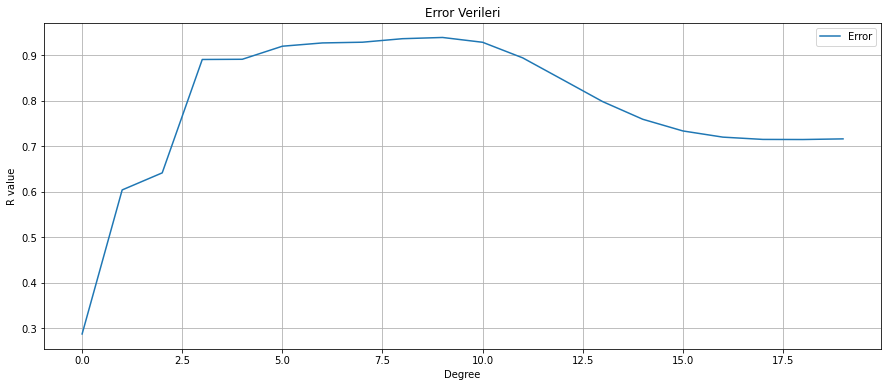

coefficient of determination: 0.939427062537786
intercept: [1.34583507]
coefficients: [[-4.61189333e-19 -1.62185590e-13 -2.15832598e-15 -9.41874414e-14
  -2.50982247e-12  3.65261745e-13 -6.36465851e-15  4.35184961e-17
  -1.33202024e-19  1.52913277e-22]]
slice_test0


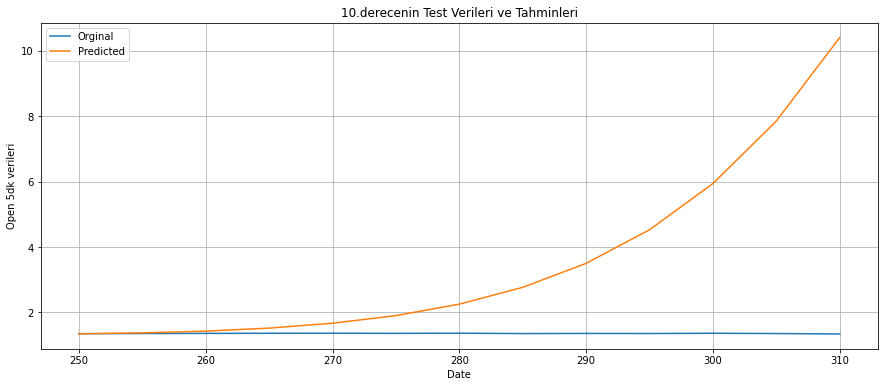

Degree 1 coefficient of determination: 0.19309061101257252
Degree 2 coefficient of determination: 0.7902905403588394
Degree 3 coefficient of determination: 0.7922616574264656
Degree 4 coefficient of determination: 0.8695668325122934
Degree 5 coefficient of determination: 0.870588792517027
Degree 6 coefficient of determination: 0.8710125757702838
Degree 7 coefficient of determination: 0.8710902369079336
Degree 8 coefficient of determination: 0.8709467787143454
Degree 9 coefficient of determination: 0.8708113950388905
Degree 10 coefficient of determination: 0.8709441860173024
Degree 11 coefficient of determination: 0.8715995246456429
Degree 12 coefficient of determination: 0.8729724157330029
Degree 13 coefficient of determination: 0.8751467587757527
Degree 14 coefficient of determination: 0.8780669927996213
Degree 15 coefficient of determination: 0.88150659235646
Degree 16 coefficient of determination: 0.8850963853745565
Degree 17 coefficient of determination: 0.8569689954676192
Degree 1

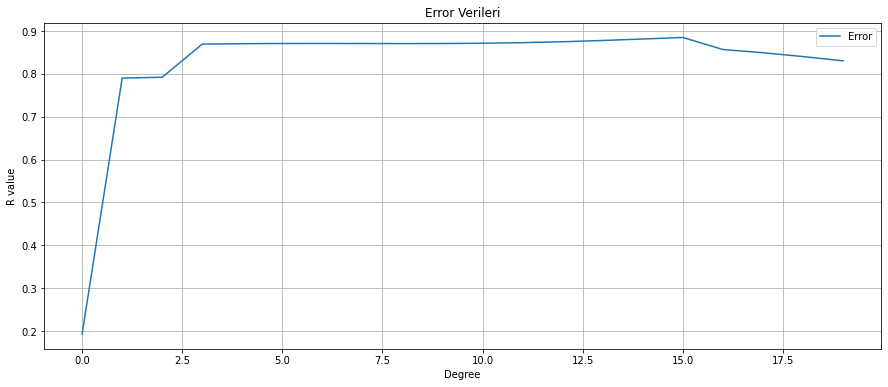

coefficient of determination: 0.8850963853745565
intercept: [1.36406221]
coefficients: [[-2.86507559e-58 -1.37386613e-32 -4.86716185e-38  1.49567691e-40
   3.17633496e-45 -4.11631587e-45 -1.28785596e-42 -3.65572454e-40
  -9.25035662e-38 -1.99342923e-35 -3.32700225e-33 -3.32265179e-31
   2.52677624e-33 -7.25114275e-36  9.30031898e-39 -4.49492757e-42]]
slice_test1


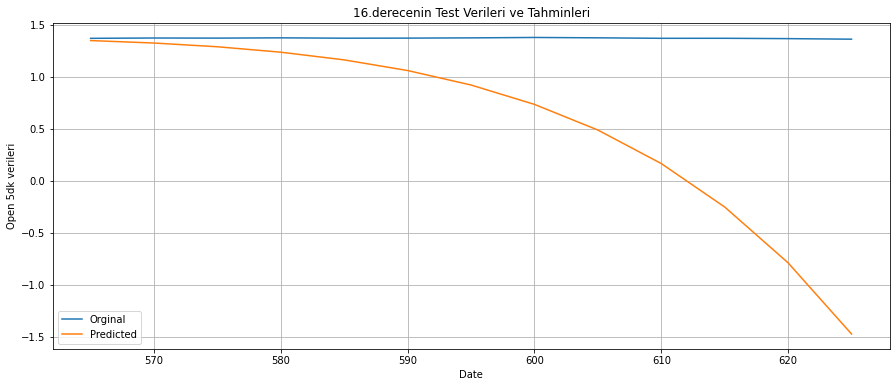

Degree 1 coefficient of determination: 0.15140520273563796
Degree 2 coefficient of determination: 0.46576963448185393
Degree 3 coefficient of determination: 0.4826123473009295
Degree 4 coefficient of determination: 0.4963025625706068
Degree 5 coefficient of determination: 0.4932133657616138
Degree 6 coefficient of determination: 0.48964507484983355
Degree 7 coefficient of determination: 0.485683360195323
Degree 8 coefficient of determination: 0.48141705820230185
Degree 9 coefficient of determination: 0.4769323844555321
Degree 10 coefficient of determination: 0.4723080374948403
Degree 11 coefficient of determination: 0.46761134468920496
Degree 12 coefficient of determination: 0.4628956616981623
Degree 13 coefficient of determination: 0.45819910631336225
Degree 14 coefficient of determination: 0.45354459828788174
Degree 15 coefficient of determination: 0.4489410778771198
Degree 16 coefficient of determination: 0.44438569451735166
Degree 17 coefficient of determination: 0.4398666983683567

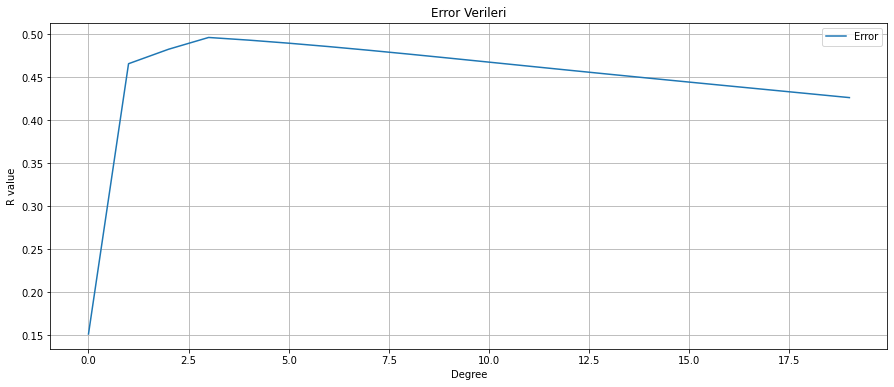

coefficient of determination: 0.4963025625706068
intercept: [16.91764628]
coefficients: [[-8.06311677e-02  1.56748873e-04 -1.35582080e-07  4.40251923e-11]]
slice_test2


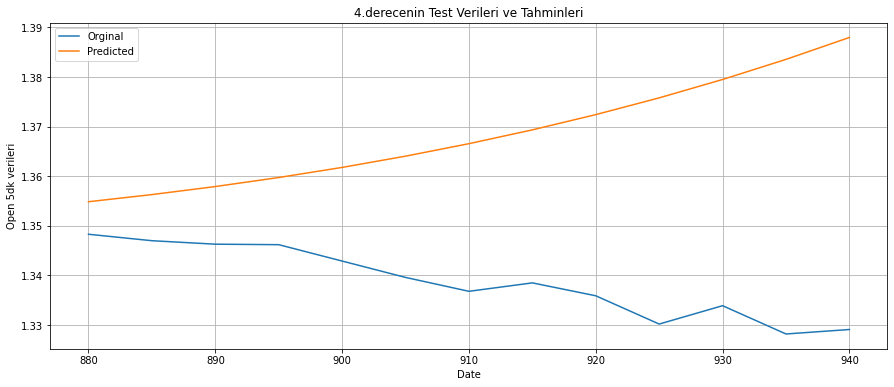

Degree 1 coefficient of determination: 0.020390875523401908
Degree 2 coefficient of determination: 0.19280961151008968
Degree 3 coefficient of determination: 0.756098556012006
Degree 4 coefficient of determination: 0.7710903591934354
Degree 5 coefficient of determination: 0.7747723379183112
Degree 6 coefficient of determination: 0.7792721457406713
Degree 7 coefficient of determination: 0.784417310439107
Degree 8 coefficient of determination: 0.7900352099769332
Degree 9 coefficient of determination: 0.7959332924461978
Degree 10 coefficient of determination: 0.8019104007412372
Degree 11 coefficient of determination: 0.8077630637986064
Degree 12 coefficient of determination: 0.8132916979315484
Degree 13 coefficient of determination: 0.8183065338050625
Degree 14 coefficient of determination: 0.822633096847489
Degree 15 coefficient of determination: 0.8261170867320913
Degree 16 coefficient of determination: 0.8286285236385066
Degree 17 coefficient of determination: 0.8300650550325365
Degree

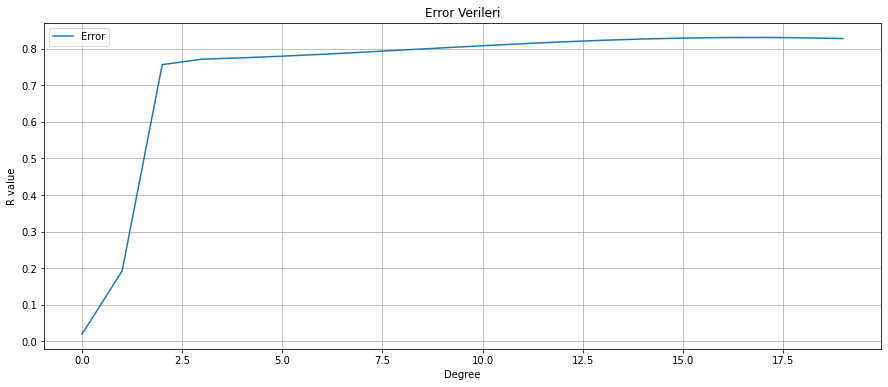

coefficient of determination: 0.8303543453629114
intercept: [1.19828537]
coefficients: [[ 6.78911440e-85 -3.71058462e-47  4.36085913e-52 -6.33431340e-56
   7.79352953e-81 -3.03856302e-64  1.71795049e-66  1.53272729e-63
   1.29723594e-60  1.03400775e-57  7.65890041e-55  5.15008274e-52
   3.01277476e-49  1.40329884e-46  4.06916502e-44 -1.04597574e-46
   8.97653540e-50 -2.57104291e-53]]
slice_test3


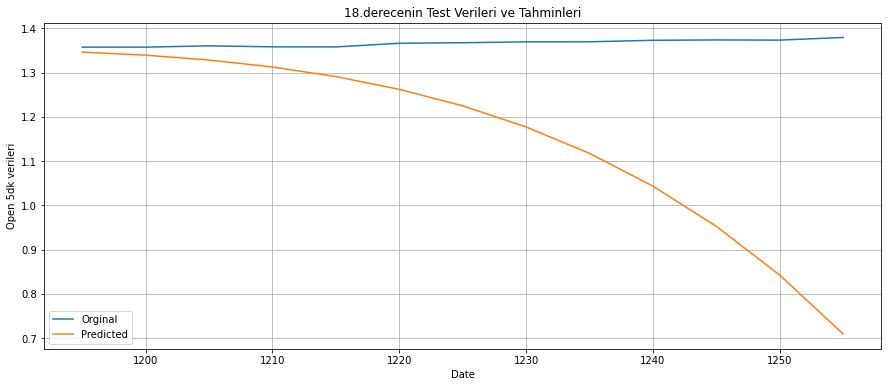

Degree 1 coefficient of determination: 0.6141094420809952
Degree 2 coefficient of determination: 0.7679944564636907
Degree 3 coefficient of determination: 0.8408373166688674
Degree 4 coefficient of determination: 0.8526196479154395
Degree 5 coefficient of determination: 0.8514221529609974
Degree 6 coefficient of determination: 0.850454944213639
Degree 7 coefficient of determination: 0.8496697775306392
Degree 8 coefficient of determination: 0.8490989142913306
Degree 9 coefficient of determination: 0.8487484627854989
Degree 10 coefficient of determination: 0.8486195265163649
Degree 11 coefficient of determination: 0.8487081772230738
Degree 12 coefficient of determination: 0.8490055348725997
Degree 13 coefficient of determination: 0.849497951952901
Degree 14 coefficient of determination: 0.8501672970337636
Degree 15 coefficient of determination: 0.8509913304813683
Degree 16 coefficient of determination: 0.851944163339473
Degree 17 coefficient of determination: 0.8529967887997599
Degree 18

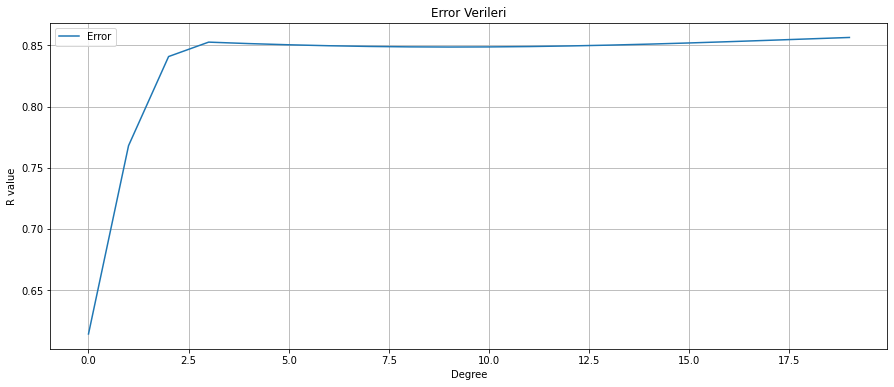

coefficient of determination: 0.856429331198928
intercept: [1.56697179]
coefficients: [[-1.91073265e-100  9.58127178e-056  4.29008118e-059 -9.66631543e-064
  -7.41841230e-068 -2.21265352e-084 -2.76935495e-081 -3.37730457e-078
  -3.95593442e-075 -4.44109187e-072 -4.75429169e-069 -4.81068007e-066
  -4.53511604e-063 -3.88856754e-060 -2.90462804e-057 -1.72925097e-054
  -6.41378739e-052  1.26797335e-054 -8.36941269e-058  1.84409135e-061]]
slice_test4


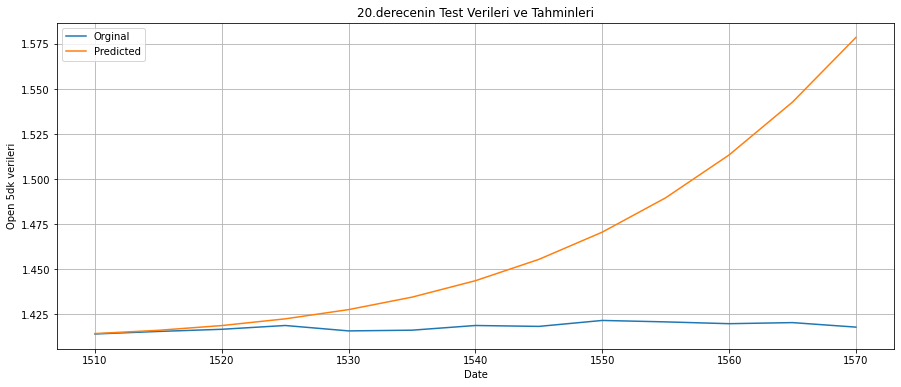

Degree 1 coefficient of determination: 0.04845352071782971
Degree 2 coefficient of determination: 0.142251873496113
Degree 3 coefficient of determination: 0.3644049683949241
Degree 4 coefficient of determination: 0.46886563490829103
Degree 5 coefficient of determination: 0.4600656447313567
Degree 6 coefficient of determination: 0.4546545141358852
Degree 7 coefficient of determination: 0.4484887906058169
Degree 8 coefficient of determination: 0.44299023089477707
Degree 9 coefficient of determination: 0.4381793329193854
Degree 10 coefficient of determination: 0.4340683587319022
Degree 11 coefficient of determination: 0.43066123495816766
Degree 12 coefficient of determination: 0.4279535505595353
Degree 13 coefficient of determination: 0.4259326523629434
Degree 14 coefficient of determination: 0.4245778444582281
Degree 15 coefficient of determination: 0.4238606811061455
Degree 16 coefficient of determination: 0.423745353713908
Degree 17 coefficient of determination: 0.424189165062443
Degre

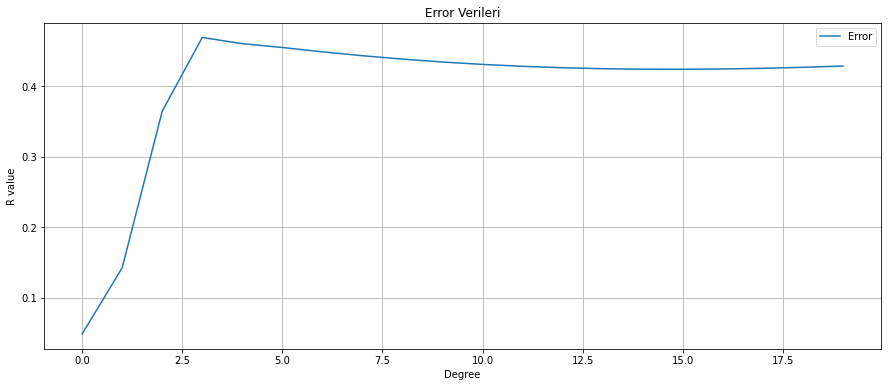

coefficient of determination: 0.46886563490829103
intercept: [-565.02432945]
coefficients: [[ 1.35790419e+00 -1.21925133e-03  4.85973641e-07 -7.25503845e-11]]
slice_test5


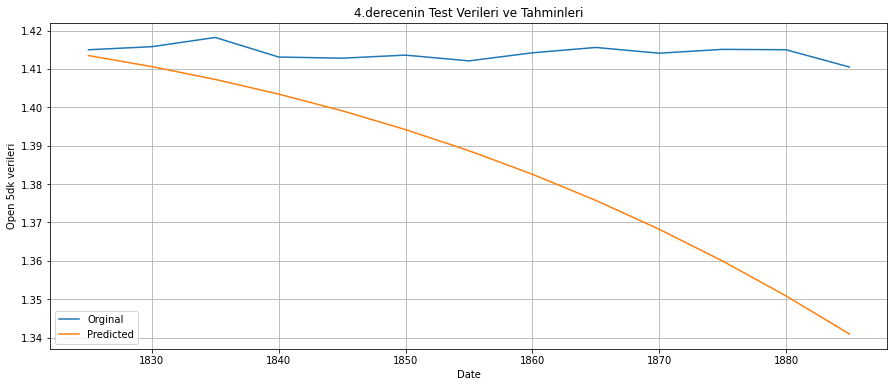

Degree 1 coefficient of determination: 0.1473461327825355
Degree 2 coefficient of determination: 0.7526878399340288
Degree 3 coefficient of determination: 0.7573770792223891
Degree 4 coefficient of determination: 0.7815148003428657
Degree 5 coefficient of determination: 0.7820627618508394
Degree 6 coefficient of determination: 0.7839042844399617
Degree 7 coefficient of determination: 0.7851149520103367
Degree 8 coefficient of determination: 0.7863290700402404
Degree 9 coefficient of determination: 0.7875412784449768
Degree 10 coefficient of determination: 0.788746268537915
Degree 11 coefficient of determination: 0.7899388303690829
Degree 12 coefficient of determination: 0.7911138883128745
Degree 13 coefficient of determination: 0.7922665375150768
Degree 14 coefficient of determination: 0.7933920925051496
Degree 15 coefficient of determination: 0.7944860708506709
Degree 16 coefficient of determination: 0.795544266187016
Degree 17 coefficient of determination: 0.7965627549857348
Degree 1

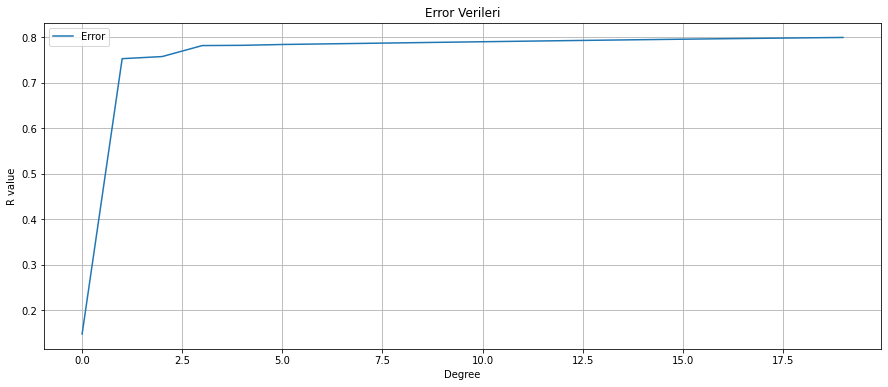

coefficient of determination: 0.7993451129492521
intercept: [1.47272845]
coefficients: [[-8.38759980e-106 -2.40613068e-058  6.35566694e-062 -2.78952603e-066
   1.30332585e-100 -6.28937474e-089 -1.15361732e-085 -2.04420533e-082
  -3.47779818e-079 -5.66861288e-076 -8.80717137e-073 -1.29286638e-069
  -1.76752790e-066 -2.19701832e-063 -2.37814056e-060 -2.05090830e-057
  -1.10149857e-054  1.58318365e-057 -7.59024206e-061  1.21362850e-064]]
slice_test6


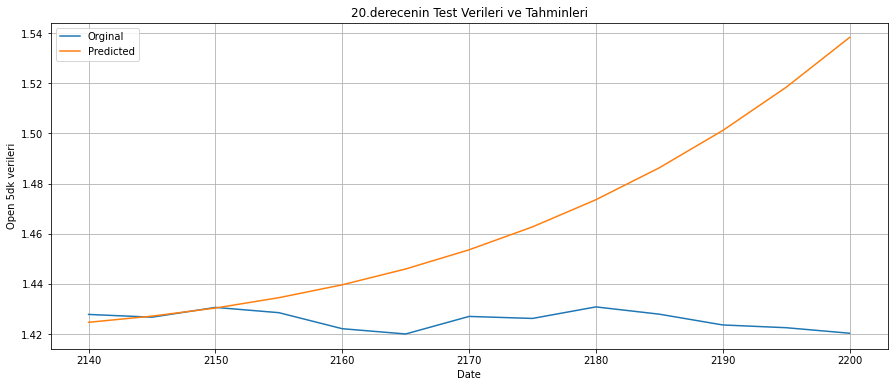

Degree 1 coefficient of determination: 0.3894033475997952
Degree 2 coefficient of determination: 0.4535709580121966
Degree 3 coefficient of determination: 0.5837141312485064
Degree 4 coefficient of determination: 0.579882660083115
Degree 5 coefficient of determination: 0.5758364916138742
Degree 6 coefficient of determination: 0.5715831052118501
Degree 7 coefficient of determination: 0.6628185965363707
Degree 8 coefficient of determination: 0.6673398174965524
Degree 9 coefficient of determination: 0.6719139326529271
Degree 10 coefficient of determination: 0.676515137784552
Degree 11 coefficient of determination: 0.6811170103891493
Degree 12 coefficient of determination: 0.6856926229274511
Degree 13 coefficient of determination: 0.6902146281947232
Degree 14 coefficient of determination: 0.6946540169873037
Degree 15 coefficient of determination: 0.6989880006301412
Degree 16 coefficient of determination: 0.7031841834405793
Degree 17 coefficient of determination: 0.7072168813521049
Degree 1

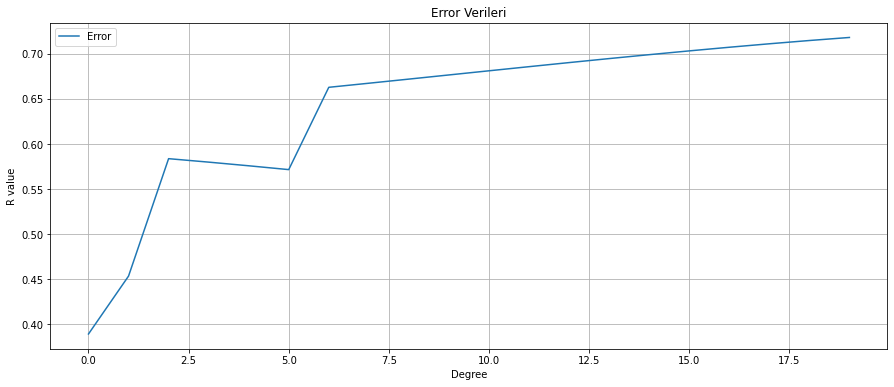

coefficient of determination: 0.7180647026484073
intercept: [2.84188627]
coefficients: [[-6.31982666e-107 -2.65127038e-057 -1.94507652e-062 -2.28855022e-066
  -2.63532909e-102 -9.78518618e-090 -2.07881885e-086 -4.25852165e-083
  -8.37490242e-080 -1.57781116e-076 -2.83321422e-073 -4.80643851e-070
  -7.59320293e-067 -1.09054538e-063 -1.36383380e-060 -1.35877255e-057
  -8.42993110e-055  1.01624635e-057 -4.09502197e-061  5.51388600e-065]]
slice_test7


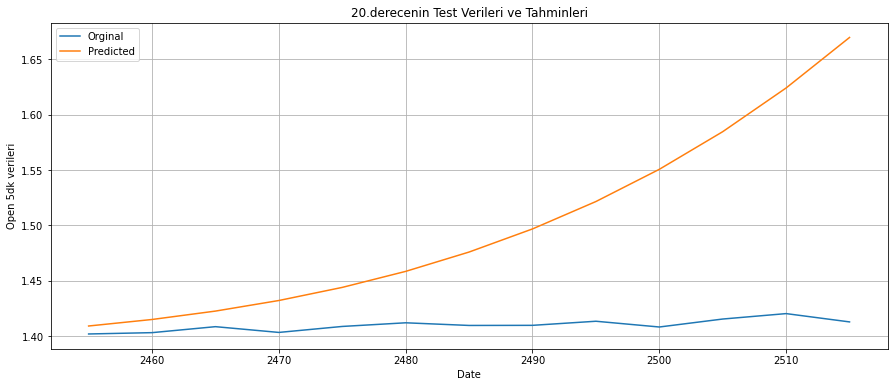

Degree 1 coefficient of determination: 0.9045304762078458
Degree 2 coefficient of determination: 0.9079090354278846
Degree 3 coefficient of determination: 0.9116320482467449
Degree 4 coefficient of determination: 0.9115951367582429
Degree 5 coefficient of determination: 0.9115553784447937
Degree 6 coefficient of determination: 0.9115128148720074
Degree 7 coefficient of determination: 0.9114674595283196
Degree 8 coefficient of determination: 0.9114192986088449
Degree 9 coefficient of determination: 0.9113682918126358
Degree 10 coefficient of determination: 0.911314373144101
Degree 11 coefficient of determination: 0.9112574517187788
Degree 12 coefficient of determination: 0.9111974125684135
Degree 13 coefficient of determination: 0.9111341174450432
Degree 14 coefficient of determination: 0.9110674056226903
Degree 15 coefficient of determination: 0.910997094695548
Degree 16 coefficient of determination: 0.9109229813729973
Degree 17 coefficient of determination: 0.9108448422708803
Degree 1

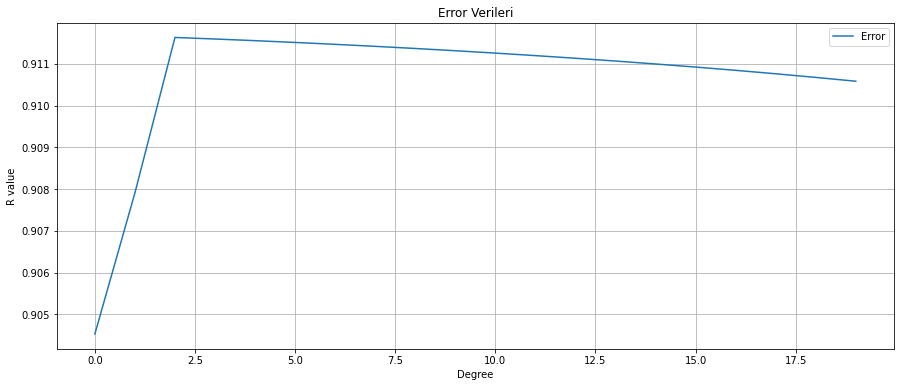

coefficient of determination: 0.9116320482467449
intercept: [-41.68067794]
coefficients: [[ 4.90696676e-02 -1.86637037e-05  2.37233614e-09]]
slice_test8


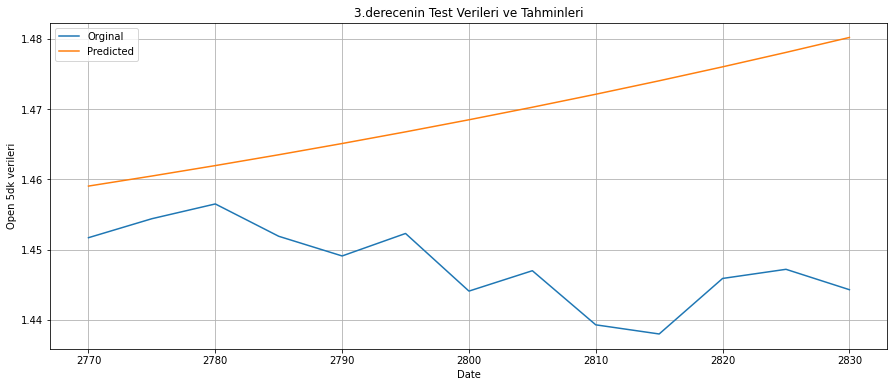

Degree 1 coefficient of determination: 0.24612346307511834
Degree 2 coefficient of determination: 0.36303811744908576
Degree 3 coefficient of determination: 0.506688631510783
Degree 4 coefficient of determination: 0.506629012551977
Degree 5 coefficient of determination: 0.5065237166040689
Degree 6 coefficient of determination: 0.5063705904817397
Degree 7 coefficient of determination: 0.506167567734584
Degree 8 coefficient of determination: 0.5059126773777951
Degree 9 coefficient of determination: 0.5056040525509831
Degree 10 coefficient of determination: 0.5052399388680657
Degree 11 coefficient of determination: 0.5048187023824455
Degree 12 coefficient of determination: 0.5043388371946533
Degree 13 coefficient of determination: 0.5037989726434151
Degree 14 coefficient of determination: 0.5031978800353083
Degree 15 coefficient of determination: 0.5025344789171773
Degree 16 coefficient of determination: 0.5018078428247705
Degree 17 coefficient of determination: 0.5010172045144001
Degree 

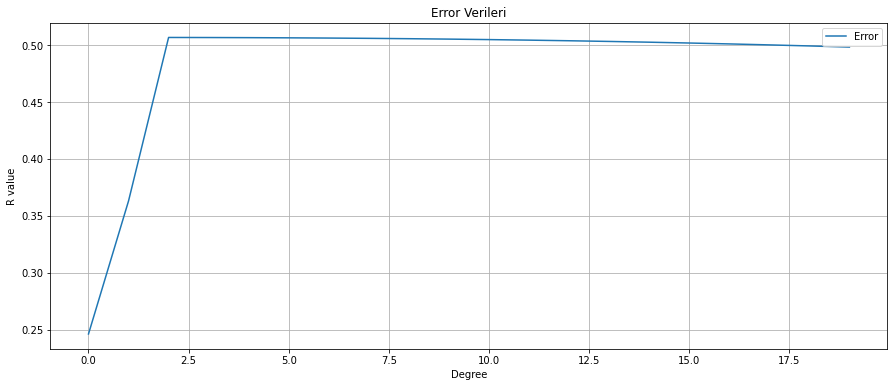

coefficient of determination: 0.506688631510783
intercept: [-191.93144667]
coefficients: [[ 1.95133501e-01 -6.55964196e-05  7.34596800e-09]]
slice_test9


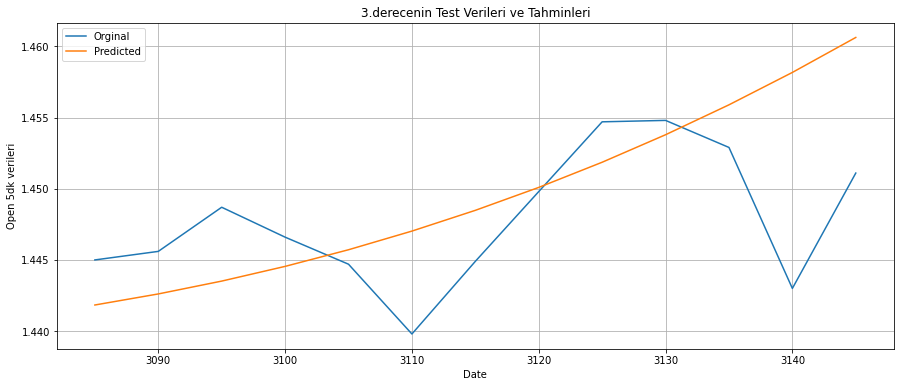

Degree 1 coefficient of determination: 0.29234659280655395
Degree 2 coefficient of determination: 0.3324108662804217
Degree 3 coefficient of determination: 0.6344938032280099
Degree 4 coefficient of determination: 0.6339067333341954
Degree 5 coefficient of determination: 0.6331169359387019
Degree 6 coefficient of determination: 0.6321294636362307
Degree 7 coefficient of determination: 0.6309498850537323
Degree 8 coefficient of determination: 0.629584263349922
Degree 9 coefficient of determination: 0.628039135613824
Degree 10 coefficient of determination: 0.6263214904324048
Degree 11 coefficient of determination: 0.6244387440700381
Degree 12 coefficient of determination: 0.622398715388818
Degree 13 coefficient of determination: 0.6202095995667574
Degree 14 coefficient of determination: 0.6178799407168707
Degree 15 coefficient of determination: 0.6154186034964151
Degree 16 coefficient of determination: 0.6128347438166741
Degree 17 coefficient of determination: 0.6101377787442294
Degree 1

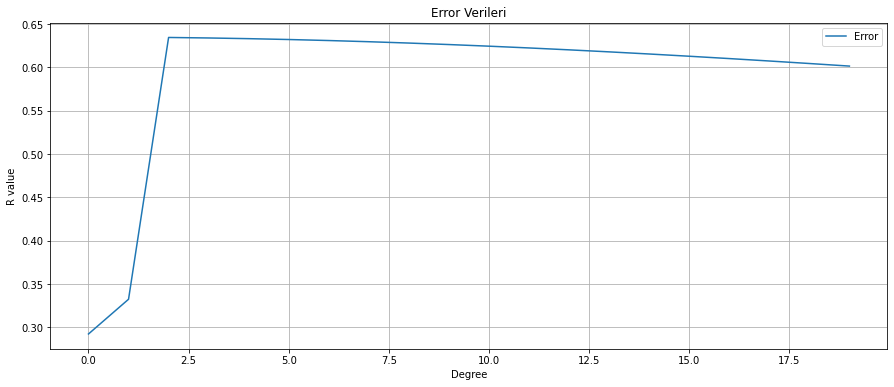

coefficient of determination: 0.6344938032280099
intercept: [-1100.55097313]
coefficients: [[ 1.01346127e+00 -3.10550477e-04  3.17067563e-08]]
slice_test10


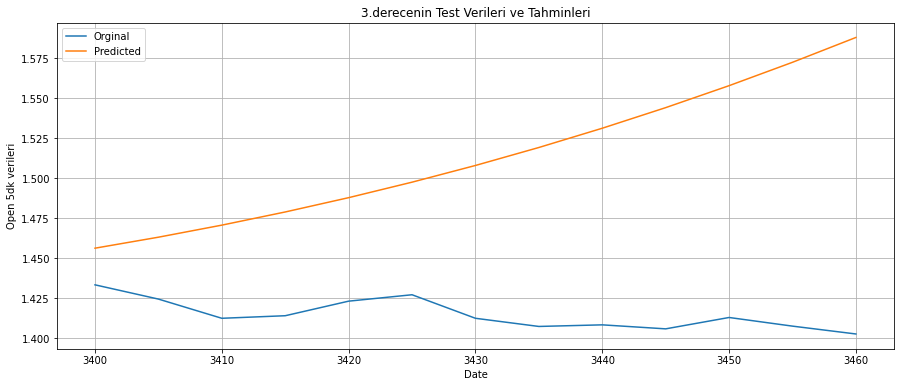

Degree 1 coefficient of determination: 0.06960702542743347
Degree 2 coefficient of determination: 0.1598678080477619
Degree 3 coefficient of determination: 0.7481340095802718
Degree 4 coefficient of determination: 0.7480923911099759
Degree 5 coefficient of determination: 0.74785353263507
Degree 6 coefficient of determination: 0.7474159072662172
Degree 7 coefficient of determination: 0.7467782696823856
Degree 8 coefficient of determination: 0.7459396519705854
Degree 9 coefficient of determination: 0.7448993661959618
Degree 10 coefficient of determination: 0.743657005158507
Degree 11 coefficient of determination: 0.7422124426324531
Degree 12 coefficient of determination: 0.7405658330184743
Degree 13 coefficient of determination: 0.73871761043243
Degree 14 coefficient of determination: 0.7366684872699969
Degree 15 coefficient of determination: 0.7344194522023043
Degree 16 coefficient of determination: 0.7319717676330804
Degree 17 coefficient of determination: 0.7293269666310895
Degree 18 

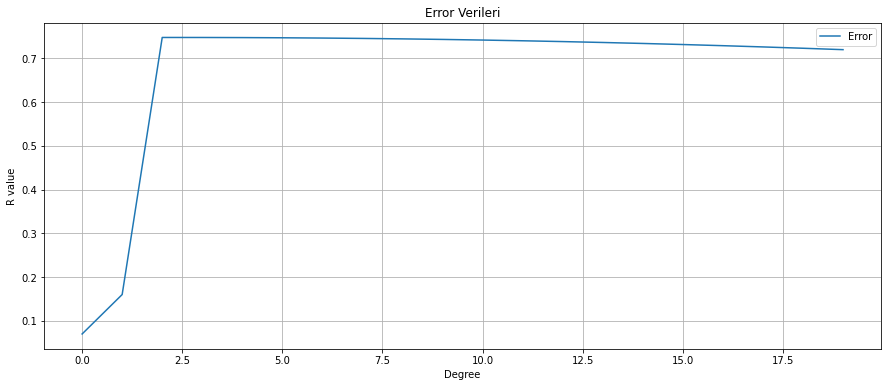

coefficient of determination: 0.7481340095802718
intercept: [-1497.92595041]
coefficients: [[ 1.25147461e+00 -3.48114912e-04  3.22708573e-08]]
slice_test11


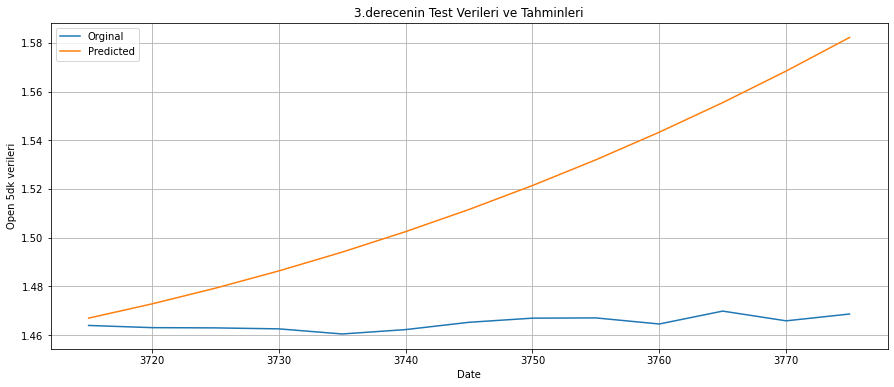

Degree 1 coefficient of determination: 0.0037815154121026984
Degree 2 coefficient of determination: 0.2758058116176294
Degree 3 coefficient of determination: 0.40091032160379925
Degree 4 coefficient of determination: 0.40266283424588223
Degree 5 coefficient of determination: 0.4044285146731307
Degree 6 coefficient of determination: 0.40620525076530556
Degree 7 coefficient of determination: 0.4079909259823309
Degree 8 coefficient of determination: 0.4097834040318147
Degree 9 coefficient of determination: 0.4115805356904989
Degree 10 coefficient of determination: 0.4133801619417061
Degree 11 coefficient of determination: 0.4151801170981264
Degree 12 coefficient of determination: 0.4169782319242742
Degree 13 coefficient of determination: 0.4187723367356645
Degree 14 coefficient of determination: 0.42056026450352746
Degree 15 coefficient of determination: 0.42233985389765394
Degree 16 coefficient of determination: 0.4241089523424709
Degree 17 coefficient of determination: 0.425865418996266

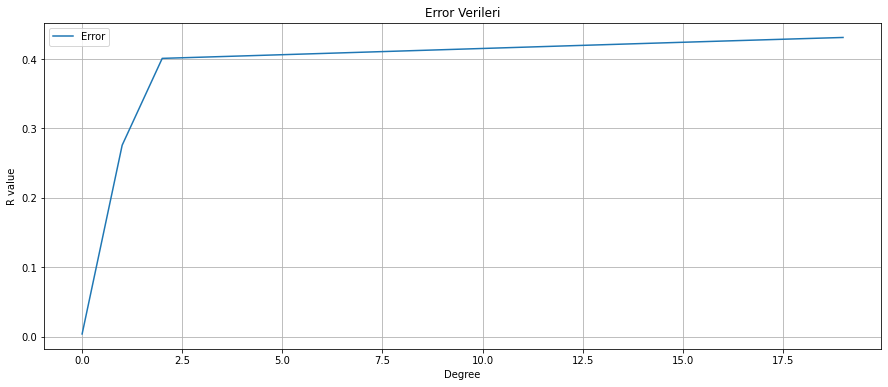

coefficient of determination: 0.43103785793608895
intercept: [2.02571418]
coefficients: [[-1.80822587e-123 -2.39139045e-069 -3.13094385e-075 -2.69880267e-079
  -1.29322896e-108 -2.68602560e-099 -4.90055508e-101 -7.71568211e-098
  -2.82514352e-094 -1.00321128e-090 -3.44880733e-087 -1.14328922e-083
  -3.62970848e-080 -1.09111318e-076 -3.04601656e-073 -7.61994365e-070
  -1.58248353e-066 -2.18362926e-063  1.05199486e-066 -1.27029213e-070]]
slice_test12


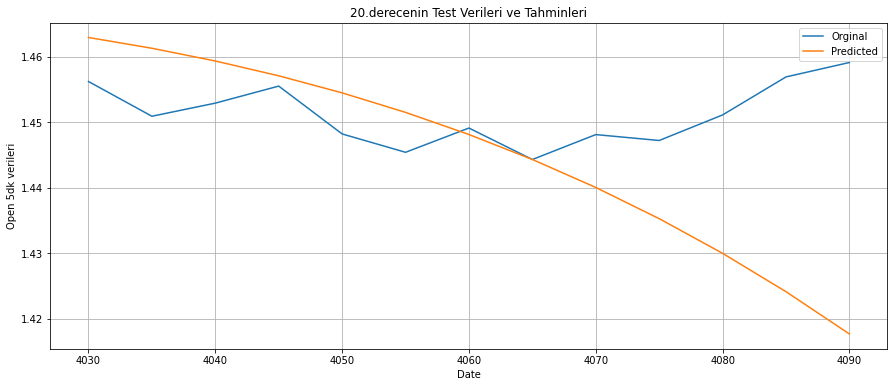

Degree 1 coefficient of determination: 0.3510846292406815
Degree 2 coefficient of determination: 0.41998042820562365
Degree 3 coefficient of determination: 0.42327294228230605
Degree 4 coefficient of determination: 0.4226449910402853
Degree 5 coefficient of determination: 0.4221197610710702
Degree 6 coefficient of determination: 0.4216978785926956
Degree 7 coefficient of determination: 0.4213798075516938
Degree 8 coefficient of determination: 0.42116584946528524
Degree 9 coefficient of determination: 0.42105614361035426
Degree 10 coefficient of determination: 0.421050667490549
Degree 11 coefficient of determination: 0.42114923758619827
Degree 12 coefficient of determination: 0.4213515103865607
Degree 13 coefficient of determination: 0.4216569837018833
Degree 14 coefficient of determination: 0.42206499825127963
Degree 15 coefficient of determination: 0.4225747395240226
Degree 16 coefficient of determination: 0.4231852399080607
Degree 17 coefficient of determination: 0.4238953810828584
D

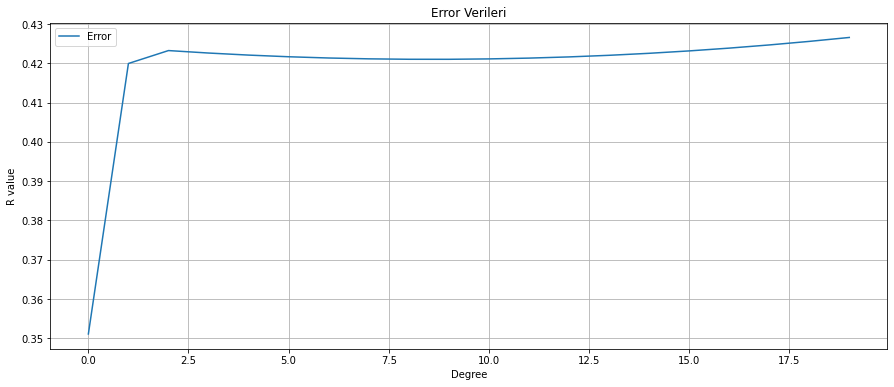

coefficient of determination: 0.4266102629582995
intercept: [1.69698892]
coefficients: [[-4.95613472e-125  8.81276255e-071  1.48164045e-075  3.37350334e-080
  -4.83215175e-110 -2.55611599e-101  3.19613554e-102 -3.63992441e-099
  -1.44019031e-095 -5.52619148e-092 -2.05281367e-088 -7.35320584e-085
  -2.52246605e-081 -8.19311996e-078 -2.47132964e-074 -6.67977868e-071
  -1.49883703e-067 -2.23456016e-064  9.91540655e-068 -1.10213611e-071]]
slice_test13


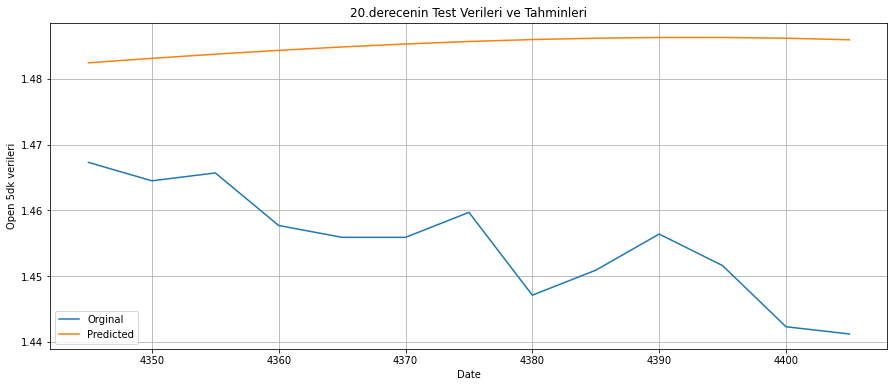

Degree 1 coefficient of determination: 0.7448060172120249
Degree 2 coefficient of determination: 0.7528358943142448
Degree 3 coefficient of determination: 0.7530642392760583
Degree 4 coefficient of determination: 0.7530098553214208
Degree 5 coefficient of determination: 0.7529590198188834
Degree 6 coefficient of determination: 0.7529120924950401
Degree 7 coefficient of determination: 0.7528694372999779
Degree 8 coefficient of determination: 0.7528314217881854
Degree 9 coefficient of determination: 0.7527984164976187
Degree 10 coefficient of determination: 0.7527707943067747
Degree 11 coefficient of determination: 0.7527489297723863
Degree 12 coefficient of determination: 0.7527331984501038
Degree 13 coefficient of determination: 0.7527239761988969
Degree 14 coefficient of determination: 0.7527216384711812
Degree 15 coefficient of determination: 0.7527265595896616
Degree 16 coefficient of determination: 0.752739112012585
Degree 17 coefficient of determination: 0.7527596655888702
Degree 

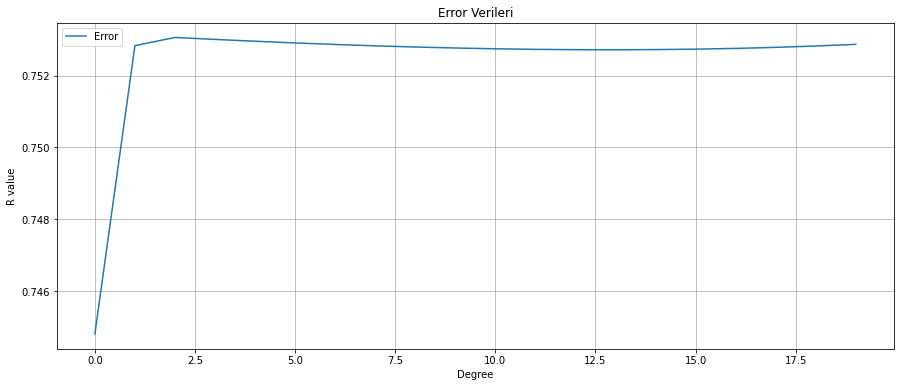

coefficient of determination: 0.7530642392760583
intercept: [77.97416573]
coefficients: [[-4.97170797e-02  1.07221430e-05 -7.67363240e-10]]
slice_test14


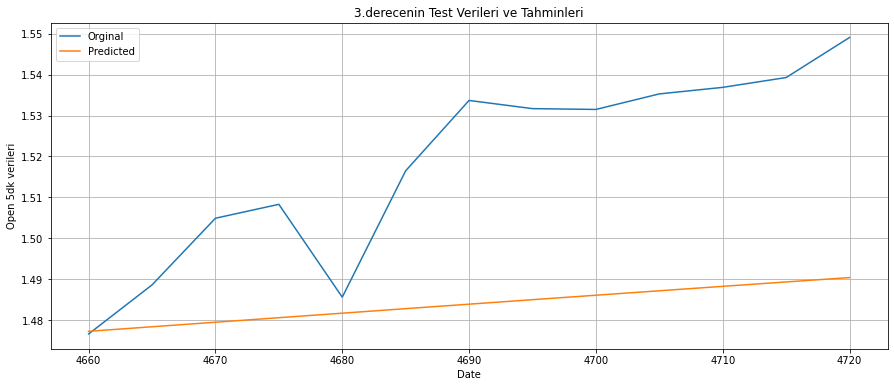

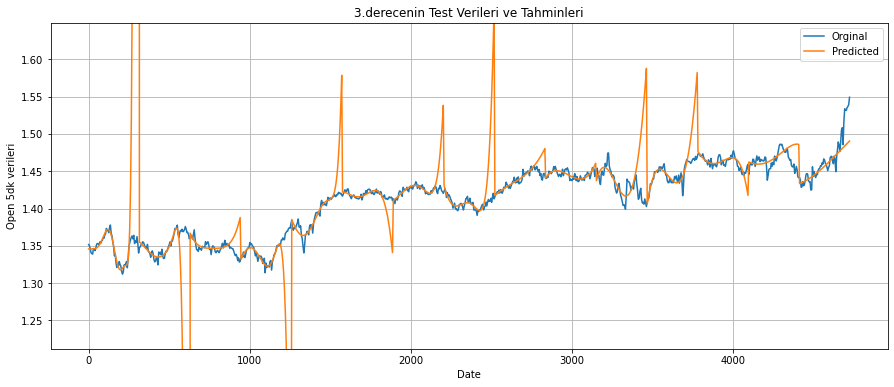

CPU times: total: 5.83 s
Wall time: 5.82 s


In [33]:
%%time
y_all = sliced_reg()

In [34]:
a=[945,950,955,960,1500,2050,2595,3085,3455]
b=[]
for i in a:
    b.append(i%945)
print(b)    

[0, 5, 10, 15, 555, 160, 705, 250, 620]


In [35]:
o=data['open'][-1]
c=data['close'][-1]
h=data['high'][-1]
l=data['low'][-1]

In [36]:
p = (h+l+c)/3

S1=2*p-h
R1=2*p-l
print('Sup1',S1,'Res1',R1)

S2=p-(h-l)
R2=p+(h-l)
print('Sup2',S2,'Res2',R2)


R3 = h + 2 * (p - l)
S3 = l - 2 * (h - p)
print('Sup3',S3,'Res2',R3)

Sup1 1.5346 Res1 1.5471
Sup2 1.5299 Res2 1.5549
Sup3 1.5221 Res2 1.5595999999999999


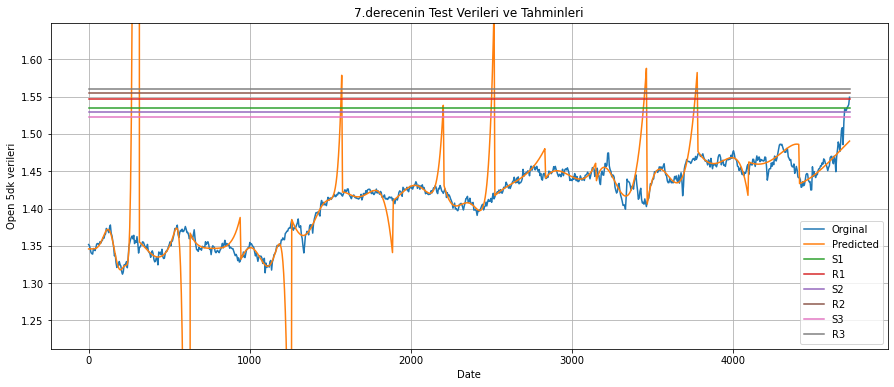

In [37]:

fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
        ylabel="Open 5dk verileri",
        title=f"{degree_num}.derecenin Test Verileri ve Tahminleri",
        ylim=(min(data['open'])-0.1,max(data['open'])+0.1))

pyplot.plot(data['date'], data['open'], label = "Orginal")
pyplot.plot(data['date'], y_all, label = "Predicted")

pyplot.plot(data['date'], [S1]*len(data['date']), label = "S1")
pyplot.plot(data['date'], [R1]*len(data['date']), label = "R1")

pyplot.plot(data['date'], [S2]*len(data['date']), label = "S2")
pyplot.plot(data['date'], [R2]*len(data['date']), label = "R2")

pyplot.plot(data['date'], [S3]*len(data['date']), label = "S3")
pyplot.plot(data['date'], [R3]*len(data['date']), label = "R3")


pyplot.legend()
pyplot.grid()

pyplot.show()